In [4]:
%ls


chunk10_aa     chunk2_aa.csv  chunk5_aa      chunk8_aa
chunk11_aa     chunk3_aa      chunk6_aa      chunk9_aa
chunk1_aa.csv  chunk4_aa      chunk7_aa


In [3]:
%cd project

/Users/chandni/Downloads/USC/dsci599/project


/Users/chandni/Library/Python/3.9/lib/python/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [8]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 11.3 MB 30.7 MB/s eta 0:00:01
     |████████████████████████████████| 347 kB 121.2 MB/s eta 0:00:01
     |████████████████████████████████| 5.3 MB 84.0 MB/s eta 0:00:01
     |████████████████████████████████| 509 kB 115.5 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [10]:
ls

chunk10_aa                           chunk7_ad
chunk10_ab                           chunk8_aa
chunk10_ac                           chunk8_ab
chunk11_aa                           chunk8_ac
chunk11_ab                           chunk8_ad
chunk11_ac                           chunk9_aa
chunk2_aa.csv                        chunk9_ab
chunk2_ab                            chunk9_ac
chunk2_ac                            chunk9_ad
chunk2_ad                            chunk_aa.csv
chunk3_aa                            chunk_ab
chunk3_ab                            chunk_ac
chunk3_ac                            chunk_ad
chunk3_ad                            data/
chunk4_aa                            drive-download-20250404T182629Z-004/
chunk4_ab                            drive-download-20250404T182629Z-005/
chunk4_ac                            part1.csv
chunk4_ad                            part10.csv
chunk5_aa                            part11.csv
chunk5_ab                            part2.csv
chunk5_a

In [11]:
cols = ['reply_type', 'time_s', 'rtt_us', 'ttl', 'probe_addr', 'reply_addr', 'flags']

df1 = pd.read_csv("chunk_aa.csv", skiprows=5, sep='\t', names=cols, usecols=range(5))

In [13]:
df1.head()

,reply_type,time_s,rtt_us,ttl,probe_addr
0,0x0000,1735750096,8105.0,117.0,34.95.72.53
1,0x0000,1735750096,4630.0,117.0,34.36.47.41
2,0x0000,1735750096,6916.0,54.0,97.118.169.190
3,0x0000,1735750096,13068.0,51.0,24.128.41.177
4,0x0301,1735750096,14492.0,56.0,64.66.36.38


In [13]:
import pandas as pd

# Column names as per your format
cols = ['reply_type', 'time_s', 'rtt_us', 'ttl', 'probe_addr', 'reply_addr', 'flags']

# Read the files correctly: tab-separated, skip 5 metadata lines
df1 = pd.read_csv("chunk_aa.csv", skiprows=5, sep='\t', names=cols, usecols=range(5))
df2 = pd.read_csv("chunk2_aa.csv", skiprows=5, sep='\t', names=cols, usecols=range(5))

# Clean up probe_addr field (remove any leading/trailing spaces)
df1['probe_addr'] = df1['probe_addr'].astype(str).str.strip()
df2['probe_addr'] = df2['probe_addr'].astype(str).str.strip()

# Get sets of unique probe_addr values
set1 = set(df1['probe_addr'].dropna().unique())
set2 = set(df2['probe_addr'].dropna().unique())

# Print stats
print(f"Unique probe_addr in chunk_aa.csv: {len(set1)}")
print(f"Unique probe_addr in chunk2_aa.csv: {len(set2)}")

overlap = set1 & set2
print(f"Overlapping probe_addr: {len(overlap)}")

# Optional: save overlapping values
# pd.DataFrame({'overlapping_probe_addr': list(overlap)}).to_csv("overlap_probe_addr.csv", index=False_


Unique probe_addr in chunk_aa.csv: 10443862
Unique probe_addr in chunk2_aa.csv: 10443862
Overlapping probe_addr: 10443853


In [14]:
df1.head()

,reply_type,time_s,rtt_us,ttl,probe_addr
0,0x0000,1735750096,8105.0,117.0,34.95.72.53
1,0x0000,1735750096,4630.0,117.0,34.36.47.41
2,0x0000,1735750096,6916.0,54.0,97.118.169.190
3,0x0000,1735750096,13068.0,51.0,24.128.41.177
4,0x0301,1735750096,14492.0,56.0,64.66.36.38


In [15]:
df['flags'].dropna().unique()

array([ 0., 30., 26.,  1., 10., 14., 20., 12., 28.])

In [17]:
df2.head()

,reply_type,time_s,rtt_us,ttl,probe_addr
0,0x0800,1735793652,0.0,0.0,69.235.197.20
1,0x0800,1735793652,0.0,0.0,216.54.133.20
2,0x0800,1735793652,0.0,0.0,176.238.53.20
3,0x0800,1735793652,0.0,0.0,222.128.53.20
4,0x0800,1735793652,0.0,0.0,58.123.42.20


In [16]:
print(len(df1))
print(len(df2))

18060609
18063363


In [18]:
import pandas as pd

# Convert a single Unix timestamp to human-readable datetime
timestamp_value = 1735750096
datetime_value = pd.to_datetime(timestamp_value, unit="s")

# Display the converted timestamp
datetime_value

Timestamp('2025-01-01 16:48:16')

In [19]:
import pandas as pd

# Convert a single Unix timestamp to human-readable datetime
timestamp_value = 1735793652
datetime_value = pd.to_datetime(timestamp_value, unit="s")

# Display the converted timestamp
datetime_value

Timestamp('2025-01-02 04:54:12')

In [28]:
cd data


/Users/chandni/Downloads/USC/dsci599/project/data


In [5]:
df1.head()

NameError: name 'df1' is not defined

In [13]:
import pandas as pd
import glob

# Column names
cols = ['reply_type', 'time_s', 'rtt_us', 'ttl', 'probe_addr', 'reply_addr', 'flags']

# Collect probe_addr sets
probe_sets = []

for i in range(1, 12):
    # Match file pattern like chunk1_aa.csv, chunk1_aa_part2.csv, etc.
    pattern = f"chunk{i}*"
    matches = glob.glob(pattern)
    
    if not matches:
        print(f"No match found for {pattern}")
        continue
    
    fname = matches[0]  # Use first match
    print(f"Processing file: {fname}")
    
    df = pd.read_csv(fname, skiprows=5, sep='\t', names=cols, usecols=range(5))
    df['probe_addr'] = df['probe_addr'].astype(str).str.strip()
    probe_set = set(df['probe_addr'].dropna().unique())
    probe_sets.append(probe_set)
    print(f"Unique probe_addr in {fname}: {len(probe_set)}")

# Union and intersection
if probe_sets:
    all_unique = set.union(*probe_sets)
    common_to_all = set.intersection(*probe_sets)
    print(f"\nTotal unique probe_addr across all matched chunks: {len(all_unique)}")
    print(f"Common probe_addr present in all chunks: {len(common_to_all)}")
else:
    print("\nNo valid files found to process.")



Processing file: chunk1_aa 4.53.46 PM.csv
Unique probe_addr in chunk1_aa 4.53.46 PM.csv: 10443862
Processing file: chunk2_aa 4.53.46 PM.csv
Unique probe_addr in chunk2_aa 4.53.46 PM.csv: 10443862
Processing file: chunk3_aa
Unique probe_addr in chunk3_aa: 10443868
Processing file: chunk4_aa
Unique probe_addr in chunk4_aa: 10443865
Processing file: chunk5_aa
Unique probe_addr in chunk5_aa: 10443864
Processing file: chunk6_aa
Unique probe_addr in chunk6_aa: 10443861
Processing file: chunk7_aa
Unique probe_addr in chunk7_aa: 10443869
Processing file: chunk8_aa
Unique probe_addr in chunk8_aa: 10443871
Processing file: chunk9_aa
Unique probe_addr in chunk9_aa: 10443865
Processing file: chunk10_aa
Unique probe_addr in chunk10_aa: 10443863
Processing file: chunk11_aa
Unique probe_addr in chunk11_aa: 10443864

Total unique probe_addr across all matched chunks: 10443895
Common probe_addr present in all chunks: 10443840


In [2]:
cd data

/Users/chandni/Downloads/USC/dsci599/project/data


In [3]:
import pandas as pd
import glob
import time

# Define expected columns
columns = ["reply_type", "time_s", "rtt_us", "ttl", "probe_addr", "reply_addr", "flags"]

# Loop through chunk1 to chunk11
for i in range(1, 12):
    pattern = f"chunk{i}_aa*"
    matches = glob.glob(pattern)
    
    if not matches:
        print(f"❌ No match found for pattern: {pattern}")
        continue

    input_file = matches[0]
    print(f"\n🔄 Processing file: {input_file}")

    try:
        start_time = time.time()

        print("📥 Reading file...")
        df = pd.read_csv(input_file, sep="\t", names=columns, header=None, skiprows=5, usecols=range(7))

        print("🕒 Converting timestamps...")
        df["time_s"] = pd.to_datetime(df["time_s"], unit="s", errors="coerce")

        print("🔢 Converting numeric columns...")
        for col in ["rtt_us", "ttl", "flags"]:
            df[col] = pd.to_numeric(df[col], errors="coerce")

        print("🧹 Cleaning probe_addr column...")
        df["probe_addr"] = df["probe_addr"].astype(str).str.strip()

        print("📊 Calculating Availability...")
        total_pings = df.groupby("probe_addr")["reply_type"].count()
        successful = df[df["reply_type"] == "0x0000"].groupby("probe_addr")["reply_type"].count()
        availability = (successful / total_pings).fillna(0).reset_index()
        availability.columns = ["probe_addr", "availability"]

        print("📊 Calculating Volatility...")
        def compute_volatility(group):
            changes = (group["reply_type"] != group["reply_type"].shift()).sum()
            return changes / len(group) if len(group) > 0 else 0

        volatility = df.groupby("probe_addr").apply(compute_volatility).reset_index()
        volatility.columns = ["probe_addr", "volatility"]

        print("📊 Calculating Median Up-Time...")
        df["up_state"] = df["reply_type"] == "0x0000"
        df["session_id"] = (df["up_state"] != df["up_state"].shift()).cumsum()
        up_sessions = df[df["up_state"]].groupby(["probe_addr", "session_id"])["time_s"].agg(["min", "max"])
        up_sessions["duration"] = (up_sessions["max"] - up_sessions["min"]).dt.total_seconds()
        median_up = up_sessions.groupby("probe_addr")["duration"].median().reset_index()
        median_up.columns = ["probe_addr", "median_up"]

        print("📊 Calculating RTT Statistics...")
        rtt_stats = df.groupby("probe_addr")["rtt_us"].agg(["median", "std"]).reset_index()
        rtt_stats.columns = ["probe_addr", "median_rtt", "std_rtt"]

        print("🧩 Merging all derived features...")
        df_final = availability.merge(volatility, on="probe_addr", how="left") \
                               .merge(median_up, on="probe_addr", how="left") \
                               .merge(rtt_stats, on="probe_addr", how="left")

        output_file = input_file.replace(".csv", "_derived.csv")
        print(f"💾 Saving derived features to {output_file}...")
        df_final.to_csv(output_file, index=False)

        print(f"✅ Done with {input_file} in {round(time.time() - start_time, 2)}s")

    except Exception as e:
        print(f"❌ Error processing {input_file}: {e}")



🔄 Processing file: chunk1_aa 4.53.46 PM.csv
📥 Reading file...
🕒 Converting timestamps...


/var/folders/zp/mnxlykzj0f1_gg0bt_rcd83c0000gn/T/ipykernel_71191/2032978483.py:27: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df["time_s"] = pd.to_datetime(df["time_s"], unit="s", errors="coerce")


🔢 Converting numeric columns...
🧹 Cleaning probe_addr column...
📊 Calculating Availability...
📊 Calculating Volatility...


/var/folders/zp/mnxlykzj0f1_gg0bt_rcd83c0000gn/T/ipykernel_71191/2032978483.py:47: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  volatility = df.groupby("probe_addr").apply(compute_volatility).reset_index()


📊 Calculating Median Up-Time...
📊 Calculating RTT Statistics...
🧩 Merging all derived features...
💾 Saving derived features to chunk1_aa 4.53.46 PM_derived.csv...
✅ Done with chunk1_aa 4.53.46 PM.csv in 756.6s

🔄 Processing file: chunk2_aa 4.53.46 PM.csv
📥 Reading file...
🕒 Converting timestamps...


/var/folders/zp/mnxlykzj0f1_gg0bt_rcd83c0000gn/T/ipykernel_71191/2032978483.py:27: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df["time_s"] = pd.to_datetime(df["time_s"], unit="s", errors="coerce")


🔢 Converting numeric columns...
🧹 Cleaning probe_addr column...
📊 Calculating Availability...
📊 Calculating Volatility...


/var/folders/zp/mnxlykzj0f1_gg0bt_rcd83c0000gn/T/ipykernel_71191/2032978483.py:47: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  volatility = df.groupby("probe_addr").apply(compute_volatility).reset_index()


📊 Calculating Median Up-Time...
📊 Calculating RTT Statistics...
🧩 Merging all derived features...
💾 Saving derived features to chunk2_aa 4.53.46 PM_derived.csv...
✅ Done with chunk2_aa 4.53.46 PM.csv in 778.98s

🔄 Processing file: chunk3_aa
📥 Reading file...
🕒 Converting timestamps...


/var/folders/zp/mnxlykzj0f1_gg0bt_rcd83c0000gn/T/ipykernel_71191/2032978483.py:27: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df["time_s"] = pd.to_datetime(df["time_s"], unit="s", errors="coerce")


🔢 Converting numeric columns...
🧹 Cleaning probe_addr column...
📊 Calculating Availability...
📊 Calculating Volatility...


/var/folders/zp/mnxlykzj0f1_gg0bt_rcd83c0000gn/T/ipykernel_71191/2032978483.py:47: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  volatility = df.groupby("probe_addr").apply(compute_volatility).reset_index()


📊 Calculating Median Up-Time...
📊 Calculating RTT Statistics...
🧩 Merging all derived features...
💾 Saving derived features to chunk3_aa...
✅ Done with chunk3_aa in 763.56s

🔄 Processing file: chunk4_aa
📥 Reading file...
🕒 Converting timestamps...


/var/folders/zp/mnxlykzj0f1_gg0bt_rcd83c0000gn/T/ipykernel_71191/2032978483.py:27: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df["time_s"] = pd.to_datetime(df["time_s"], unit="s", errors="coerce")


🔢 Converting numeric columns...
🧹 Cleaning probe_addr column...
📊 Calculating Availability...
📊 Calculating Volatility...


/var/folders/zp/mnxlykzj0f1_gg0bt_rcd83c0000gn/T/ipykernel_71191/2032978483.py:47: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  volatility = df.groupby("probe_addr").apply(compute_volatility).reset_index()


📊 Calculating Median Up-Time...
📊 Calculating RTT Statistics...
🧩 Merging all derived features...
💾 Saving derived features to chunk4_aa...
✅ Done with chunk4_aa in 764.21s

🔄 Processing file: chunk5_aa
📥 Reading file...
🕒 Converting timestamps...


/var/folders/zp/mnxlykzj0f1_gg0bt_rcd83c0000gn/T/ipykernel_71191/2032978483.py:27: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df["time_s"] = pd.to_datetime(df["time_s"], unit="s", errors="coerce")


🔢 Converting numeric columns...
🧹 Cleaning probe_addr column...
📊 Calculating Availability...
📊 Calculating Volatility...


/var/folders/zp/mnxlykzj0f1_gg0bt_rcd83c0000gn/T/ipykernel_71191/2032978483.py:47: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  volatility = df.groupby("probe_addr").apply(compute_volatility).reset_index()


📊 Calculating Median Up-Time...
📊 Calculating RTT Statistics...
🧩 Merging all derived features...
💾 Saving derived features to chunk5_aa...
✅ Done with chunk5_aa in 1070.6s

🔄 Processing file: chunk6_aa
📥 Reading file...
🕒 Converting timestamps...


/var/folders/zp/mnxlykzj0f1_gg0bt_rcd83c0000gn/T/ipykernel_71191/2032978483.py:27: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df["time_s"] = pd.to_datetime(df["time_s"], unit="s", errors="coerce")


🔢 Converting numeric columns...
🧹 Cleaning probe_addr column...
📊 Calculating Availability...
📊 Calculating Volatility...


/var/folders/zp/mnxlykzj0f1_gg0bt_rcd83c0000gn/T/ipykernel_71191/2032978483.py:47: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  volatility = df.groupby("probe_addr").apply(compute_volatility).reset_index()


📊 Calculating Median Up-Time...
📊 Calculating RTT Statistics...
🧩 Merging all derived features...
💾 Saving derived features to chunk6_aa...
✅ Done with chunk6_aa in 768.13s

🔄 Processing file: chunk7_aa
📥 Reading file...
🕒 Converting timestamps...


/var/folders/zp/mnxlykzj0f1_gg0bt_rcd83c0000gn/T/ipykernel_71191/2032978483.py:27: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df["time_s"] = pd.to_datetime(df["time_s"], unit="s", errors="coerce")


🔢 Converting numeric columns...
🧹 Cleaning probe_addr column...
📊 Calculating Availability...
📊 Calculating Volatility...


/var/folders/zp/mnxlykzj0f1_gg0bt_rcd83c0000gn/T/ipykernel_71191/2032978483.py:47: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  volatility = df.groupby("probe_addr").apply(compute_volatility).reset_index()


📊 Calculating Median Up-Time...
📊 Calculating RTT Statistics...
🧩 Merging all derived features...
💾 Saving derived features to chunk7_aa...
✅ Done with chunk7_aa in 767.55s

🔄 Processing file: chunk8_aa
📥 Reading file...
🕒 Converting timestamps...


/var/folders/zp/mnxlykzj0f1_gg0bt_rcd83c0000gn/T/ipykernel_71191/2032978483.py:27: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df["time_s"] = pd.to_datetime(df["time_s"], unit="s", errors="coerce")


🔢 Converting numeric columns...
🧹 Cleaning probe_addr column...
📊 Calculating Availability...
📊 Calculating Volatility...


/var/folders/zp/mnxlykzj0f1_gg0bt_rcd83c0000gn/T/ipykernel_71191/2032978483.py:47: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  volatility = df.groupby("probe_addr").apply(compute_volatility).reset_index()


📊 Calculating Median Up-Time...
📊 Calculating RTT Statistics...
🧩 Merging all derived features...
💾 Saving derived features to chunk8_aa...
✅ Done with chunk8_aa in 768.66s

🔄 Processing file: chunk9_aa
📥 Reading file...
🕒 Converting timestamps...


/var/folders/zp/mnxlykzj0f1_gg0bt_rcd83c0000gn/T/ipykernel_71191/2032978483.py:27: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df["time_s"] = pd.to_datetime(df["time_s"], unit="s", errors="coerce")


🔢 Converting numeric columns...
🧹 Cleaning probe_addr column...
📊 Calculating Availability...
📊 Calculating Volatility...


/var/folders/zp/mnxlykzj0f1_gg0bt_rcd83c0000gn/T/ipykernel_71191/2032978483.py:47: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  volatility = df.groupby("probe_addr").apply(compute_volatility).reset_index()


📊 Calculating Median Up-Time...
📊 Calculating RTT Statistics...
🧩 Merging all derived features...
💾 Saving derived features to chunk9_aa...
✅ Done with chunk9_aa in 776.65s

🔄 Processing file: chunk10_aa
📥 Reading file...
🕒 Converting timestamps...


/var/folders/zp/mnxlykzj0f1_gg0bt_rcd83c0000gn/T/ipykernel_71191/2032978483.py:27: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df["time_s"] = pd.to_datetime(df["time_s"], unit="s", errors="coerce")


🔢 Converting numeric columns...
🧹 Cleaning probe_addr column...
📊 Calculating Availability...
📊 Calculating Volatility...


/var/folders/zp/mnxlykzj0f1_gg0bt_rcd83c0000gn/T/ipykernel_71191/2032978483.py:47: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  volatility = df.groupby("probe_addr").apply(compute_volatility).reset_index()


📊 Calculating Median Up-Time...
📊 Calculating RTT Statistics...
🧩 Merging all derived features...
💾 Saving derived features to chunk10_aa...
✅ Done with chunk10_aa in 812.8s

🔄 Processing file: chunk11_aa
📥 Reading file...
🕒 Converting timestamps...


/var/folders/zp/mnxlykzj0f1_gg0bt_rcd83c0000gn/T/ipykernel_71191/2032978483.py:27: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df["time_s"] = pd.to_datetime(df["time_s"], unit="s", errors="coerce")


🔢 Converting numeric columns...
🧹 Cleaning probe_addr column...
📊 Calculating Availability...
📊 Calculating Volatility...


/var/folders/zp/mnxlykzj0f1_gg0bt_rcd83c0000gn/T/ipykernel_71191/2032978483.py:47: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  volatility = df.groupby("probe_addr").apply(compute_volatility).reset_index()


📊 Calculating Median Up-Time...
📊 Calculating RTT Statistics...
🧩 Merging all derived features...
💾 Saving derived features to chunk11_aa...
✅ Done with chunk11_aa in 811.92s


In [14]:
df['reply_type'].dropna().unique()

array(['0x0800', '0x0000', '0x0301', '0x0b00', '0x030d', '0x0303',
       '0x0300', '0x030a', '0x0309', '0x0302', '# TXT:', '0x0307',
       '0x0304', '0x0400'], dtype=object)

In [16]:
df['flags'].dropna().unique()

array([ 0., 30., 26.,  1., 10., 14., 20., 12., 28.])

In [18]:
df_final.head()

,probe_addr,availability,volatility,median_up,median_rtt,std_rtt
0,--------,0.986962,0.020157,0.0,0.0,65117.720364
1,1.0.137.0,0.000000,0.500000,NaN,0.0,0.000000
2,1.0.137.1,1.000000,0.500000,0.0,257266.5,10637.007309
3,1.0.137.10,0.000000,0.500000,NaN,0.0,0.000000
4,1.0.137.100,0.000000,0.500000,NaN,0.0,0.000000


In [19]:
ls

chunk10_aa                           chunk7_ad
chunk10_ab                           chunk8_aa
chunk10_ac                           chunk8_ab
chunk11_aa                           chunk8_ac
chunk11_ab                           chunk8_ad
chunk11_ac                           chunk9_aa
chunk2_aa.csv                        chunk9_ab
chunk2_ab                            chunk9_ac
chunk2_ac                            chunk9_ad
chunk2_ad                            chunk_aa.csv
chunk3_aa                            chunk_ab
chunk3_ab                            chunk_ac
chunk3_ac                            chunk_ad
chunk3_ad                            data/
chunk4_aa                            drive-download-20250404T182629Z-004/
chunk4_ab                            drive-download-20250404T182629Z-005/
chunk4_ac                            part1.csv
chunk4_ad                            part10.csv
chunk5_aa                            part11.csv
chunk5_ab                            part2.csv
chunk5_a

In [20]:
cd data/

/Users/chandni/Downloads/USC/dsci599/project/data


/Users/chandni/Library/Python/3.9/lib/python/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [1]:
cd project/data


/Users/chandni/Downloads/USC/dsci599/project/data


/Users/chandni/Library/Python/3.9/lib/python/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
ls

chunk10_aa     chunk2_aa.csv  chunk5_aa      chunk8_aa
chunk11_aa     chunk3_aa      chunk6_aa      chunk9_aa
chunk1_aa.csv  chunk4_aa      chunk7_aa


In [9]:
# import socket
# import re
# import pandas as pd
# import time

# # ---------------------------
# # Candidate regex patterns for extracting router name components.
# # (These are illustrative; you can refine them with your training data)
# regex_patterns = [
#     r'^([a-z]+)\.[a-z\d]+\.[a-z]+$',         # Example: "core.router.isp" -> extracts "core"
#     r'^(?:[a-z\d]+\.)*([a-z]+)\.[a-z]+$'       # More flexible pattern
# ]

# # Define keyword lists for labeling.
# dhcp_keywords = ['nat', 'ppp', 'dyn']           # Keywords indicating dynamic/DHCP/NAT
# static_keywords = ['static', 'biz', 'server']    # Keywords indicating static/commercial

# # Cache for reverse DNS lookups to avoid duplicate queries.
# dns_cache = {}

# def reverse_dns_lookup(ip):
#     """Perform a reverse DNS lookup for an IP address using caching."""
#     if ip in dns_cache:
#         return dns_cache[ip]
#     try:
#         hostname = socket.gethostbyaddr(ip)[0]
#     except Exception as e:
#         # print(f"  [ReverseDNS] Failed lookup for {ip}: {e}")
#         hostname = ''
#     dns_cache[ip] = hostname
#     return hostname

# def extract_router_component(hostname, patterns):
#     """Given a hostname, try each regex (on the lowercase hostname) and return
#     the first captured group if found; otherwise, return the full hostname (lowercased)."""
#     h_lower = hostname.lower()
#     for pattern in patterns:
#         match = re.search(pattern, h_lower)
#         if match:
#             return match.group(1)
#     return h_lower

# def label_hostname(hostname):
#     """Assign a label based on keywords found in the hostname."""
#     h_lower = hostname.lower()
#     if any(keyword in h_lower for keyword in dhcp_keywords):
#         return 'DHCP/NAT'
#     elif any(keyword in h_lower for keyword in static_keywords):
#         return 'static/commercial'
#     else:
#         return 'unknown'

# def label_ip(ip):
#     """For a given IP, perform reverse DNS lookup, extract a router component,
#     and assign a label. Prints debug messages along the way."""
#     # print(f"Processing IP: {ip}")
#     hostname = reverse_dns_lookup(ip)
#     extracted = extract_router_component(hostname, regex_patterns) if hostname else ''
#     # print(f"  Extracted component: {extracted}")
#     label = label_hostname(hostname) if hostname else 'unresolved'
#     # print(f"  Label: {label}")
#     return hostname, extracted, label

# # ---------------------------
# # Main processing code:
# # Use a fixed input file name "chunk1_aa.csv"
# input_file = "chunk1_aa.csv"
# output_file = "chunk1_aa_labeled.csv"  # Append _labeled to base name

# print(f"Reading input from: {input_file}")
# chunksize = 10000  # Process 100 rows at a time to lower memory usage

# # Create an iterator for reading the CSV file in chunks.
# try:
#     reader = pd.read_csv(input_file, chunksize=chunksize)
# except Exception as e:
#     print(f"Failed to read file {input_file}: {e}")
#     exit()

# first_chunk = True
# chunk_counter = 0

# for chunk in reader:
#     chunk_counter += 1
#     print(f"\n--- Processing chunk {chunk_counter} (rows {chunk.index[0]} to {chunk.index[-1]}) ---")
#     # Apply the labeling function to each entry in 'probe_addr'
#     # Expecting that the file has headers: probe_addr, availability, volatility, median_up, median_rtt, std_rtt
#     chunk[['hostname', 'extracted_router', 'label']] = chunk['probe_addr'].apply(
#         lambda ip: pd.Series(label_ip(ip))
#     )
    
#     # Write out the processed chunk to a new file without overwriting the original.
#     # Write header for the first chunk only.
#     if first_chunk:
#         chunk.to_csv(output_file, index=False, mode='w')
#         first_chunk = False
#     else:
#         chunk.to_csv(output_file, index=False, header=False, mode='a')
        
#     print(f"Chunk {chunk_counter} processed and appended to {output_file}")

# print(f"\nProcessing complete. Final output saved to: {output_file}")


Reading input from: chunk1_aa.csv

--- Processing chunk 1 (rows 0 to 9999) ---
Chunk 1 processed and appended to chunk1_aa_labeled.csv

--- Processing chunk 2 (rows 10000 to 19999) ---
Chunk 2 processed and appended to chunk1_aa_labeled.csv

--- Processing chunk 3 (rows 20000 to 29999) ---


KeyboardInterrupt: 

In [13]:
import socket
import re
import pandas as pd
import glob
import time
from concurrent.futures import ThreadPoolExecutor, as_completed

# Set DNS timeout to 0.2 seconds.
socket.setdefaulttimeout(0.3)

# Candidate regex patterns for extracting router name components.
regex_patterns = [
    r'^([a-z]+)\.[a-z\d]+\.[a-z]+$',
    r'^(?:[a-z\d]+\.)*([a-z]+)\.[a-z]+$'
]

# Keyword lists for labeling.
dhcp_keywords = ['nat', 'ppp', 'dyn']
static_keywords = ['static', 'biz', 'server']

def reverse_dns_lookup(ip):
    """Perform a reverse DNS lookup for an IP address with a 0.2-second timeout."""
    try:
        return socket.gethostbyaddr(ip)[0]
    except Exception:
        return ''

def extract_router_component(hostname, patterns):
    """Extract the router component from a hostname using candidate regex patterns."""
    h_lower = hostname.lower()
    for pattern in patterns:
        match = re.search(pattern, h_lower)
        if match:
            return match.group(1)
    return h_lower

def label_hostname(hostname):
    """Label the hostname based on keywords."""
    h_lower = hostname.lower()
    if any(keyword in h_lower for keyword in dhcp_keywords):
        return 'DHCP/NAT'
    elif any(keyword in h_lower for keyword in static_keywords):
        return 'static/commercial'
    else:
        return 'unknown'

def label_ip(ip):
    """For a given IP, perform reverse DNS lookup, extract component, and assign label."""
    hostname = reverse_dns_lookup(ip)
    if not hostname:
        return '', '', 'unresolved'
    extracted = extract_router_component(hostname, regex_patterns)
    label = label_hostname(hostname)
    return hostname, extracted, label

def parallel_label_ips(ip_list, max_workers=50):
    """
    Given a list of IP addresses, perform reverse DNS lookups in parallel.
    Returns a dictionary mapping IP -> (hostname, extracted, label)
    """
    results = {}
    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        futures = {executor.submit(label_ip, ip): ip for ip in ip_list}
        for future in as_completed(futures):
            ip = futures[future]
            try:
                results[ip] = future.result()
            except Exception as e:
                results[ip] = ('', '', 'error')
    return results

# Main processing code.
input_file = "chunk1_aa.csv"
output_file = "chunk1_aa_labeled.csv"
start_row = 20000

print(f"Reading input from: {input_file}")
chunksize = 1000  # Adjust as needed.

try:
    reader = pd.read_csv(input_file, chunksize=chunksize)
except Exception as e:
    print(f"Failed to read {input_file}: {e}")
    exit()

first_chunk = True
chunk_counter = 0

for chunk in reader:
    # Process only rows >= start_row.
    if chunk.index[-1] < start_row:
        print(f"Skipping chunk with rows {chunk.index[0]} to {chunk.index[-1]}")
        continue
    if chunk.index[0] < start_row:
        chunk = chunk.loc[chunk.index >= start_row]
    
    chunk_counter += 1
    print(f"\n--- Processing chunk {chunk_counter} (rows {chunk.index[0]} to {chunk.index[-1]}) ---")
    
    if 'probe_addr' not in chunk.columns:
        print("  'probe_addr' column not found; skipping chunk.")
        continue
    
    # Extract unique IPs from this chunk.
    ips = chunk['probe_addr'].dropna().unique().tolist()
    print(f"  Found {len(ips)} unique IP addresses in this chunk.")
    
    # Use parallel DNS lookup over these unique IP addresses.
    ip_results = parallel_label_ips(ips, max_workers=50)
    
    # Map results back to the DataFrame.
    chunk['hostname'] = chunk['probe_addr'].apply(lambda ip: ip_results.get(ip, ('', '', 'error'))[0])
    chunk['extracted_router'] = chunk['probe_addr'].apply(lambda ip: ip_results.get(ip, ('', '', 'error'))[1])
    chunk['label'] = chunk['probe_addr'].apply(lambda ip: ip_results.get(ip, ('', '', 'error'))[2])
    

    chunk.to_csv(output_file, index=False, header=False, mode='a')
    
    print(f"  Chunk {chunk_counter} processed and appended to {output_file}")

print(f"\nProcessing complete. Final output saved to: {output_file}")


Reading input from: chunk1_aa.csv
Skipping chunk with rows 0 to 999
Skipping chunk with rows 1000 to 1999
Skipping chunk with rows 2000 to 2999
Skipping chunk with rows 3000 to 3999
Skipping chunk with rows 4000 to 4999
Skipping chunk with rows 5000 to 5999
Skipping chunk with rows 6000 to 6999
Skipping chunk with rows 7000 to 7999
Skipping chunk with rows 8000 to 8999
Skipping chunk with rows 9000 to 9999
Skipping chunk with rows 10000 to 10999
Skipping chunk with rows 11000 to 11999
Skipping chunk with rows 12000 to 12999
Skipping chunk with rows 13000 to 13999
Skipping chunk with rows 14000 to 14999
Skipping chunk with rows 15000 to 15999
Skipping chunk with rows 16000 to 16999
Skipping chunk with rows 17000 to 17999
Skipping chunk with rows 18000 to 18999
Skipping chunk with rows 19000 to 19999

--- Processing chunk 1 (rows 20000 to 20999) ---
  Found 1000 unique IP addresses in this chunk.
  Chunk 1 processed and appended to chunk1_aa_labeled.csv

--- Processing chunk 2 (rows 2100

KeyboardInterrupt: 

In [4]:
pip install dnspython

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 313 kB 4.1 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
ls

chunk10_aa             chunk2_aa.csv          chunk6_aa
chunk11_aa             chunk3_aa              chunk7_aa
chunk1_aa.csv          chunk4_aa              chunk8_aa
chunk1_aa_labeled.csv  chunk5_aa              chunk9_aa


In [10]:
import time
import dns.resolver
import dns.reversename

ip = "1.0.137.0"
start_time = time.time()

# Configure the resolver: use Google's public DNS and set a timeout.
resolver = dns.resolver.Resolver()
resolver.nameservers = ['8.8.8.8']
resolver.lifetime = 0.4  # You can adjust the timeout as needed (e.g., 0.5 seconds)

try:
    rev_name = dns.reversename.from_address(ip)
    answers = resolver.resolve(rev_name, 'PTR')
    for rdata in answers:
        hostname = str(rdata.target).rstrip('.')
        print(f"Hostname for IP {ip}: {hostname}")
except Exception as e:
    print(f"Failed to resolve IP {ip}: {e}")

elapsed = time.time() - start_time
print(f"Lookup took {elapsed:.4f} seconds")


Hostname for IP 1.0.137.0: node-1s0.pool-1-0.dynamic.nt-isp.net
Lookup took 0.0262 seconds


In [20]:
# import socket
# import re
# import pandas as pd
# import glob
# import time
# from concurrent.futures import ThreadPoolExecutor, as_completed

# # Set DNS timeout to 0.2 seconds.
# socket.setdefaulttimeout(1)

# # Candidate regex patterns for extracting router name components.
# regex_patterns = [
#     r'^([a-z]+)\.[a-z\d]+\.[a-z]+$',
#     r'^(?:[a-z\d]+\.)*([a-z]+)\.[a-z]+$'
# ]

# # Keyword lists for labeling.
# dhcp_keywords = ['nat', 'ppp', 'dyn']
# static_keywords = ['static', 'biz', 'server']

# import dns.resolver
# import dns.reversename

# def reverse_dns_lookup(ip):
#     return reverse_dns_lookup_dnspython(ip) 
    
# def reverse_dns_lookup_dnspython(ip):
#     """
#     Perform a reverse DNS lookup for an IP address using dnspython.
#     It uses Google's public DNS server and a 0.2-second timeout.
#     Returns the hostname (without the trailing dot) if available; otherwise, returns an empty string.
#     """
#     try:
#         resolver = dns.resolver.Resolver()
#         resolver.nameservers = ['8.8.8.8']  # Use Google's public DNS
#         resolver.lifetime = 0.5  # Set overall timeout to 0.2 seconds
#         rev_name = dns.reversename.from_address(ip)
#         answers = resolver.resolve(rev_name, 'PTR')
#         for rdata in answers:
#             hostname = str(rdata.target).rstrip('.')
#             return hostname
#     except Exception as e:
#         return ''


# def extract_router_component(hostname, patterns):
#     """Extract the router component from a hostname using candidate regex patterns."""
#     h_lower = hostname.lower()
#     for pattern in patterns:
#         match = re.search(pattern, h_lower)
#         if match:
#             return match.group(1)
#     return h_lower

# def label_hostname(hostname):
#     """Label the hostname based on keywords."""
#     h_lower = hostname.lower()
#     if any(keyword in h_lower for keyword in dhcp_keywords):
#         return 'DHCP/NAT'
#     elif any(keyword in h_lower for keyword in static_keywords):
#         return 'static/commercial'
#     else:
#         return 'unknown'

# def label_ip(ip):
#     """For a given IP, perform reverse DNS lookup, extract component, and assign label."""
#     hostname = reverse_dns_lookup(ip)
#     if not hostname:
#         return '', '', 'unresolved'
#     extracted = extract_router_component(hostname, regex_patterns)
#     label = label_hostname(hostname)
#     return hostname, extracted, label

# def parallel_label_ips(ip_list, max_workers=50):
#     """
#     Given a list of IP addresses, perform reverse DNS lookups in parallel.
#     Returns a dictionary mapping IP -> (hostname, extracted, label)
#     """
#     results = {}
#     with ThreadPoolExecutor(max_workers=max_workers) as executor:
#         futures = {executor.submit(label_ip, ip): ip for ip in ip_list}
#         for future in as_completed(futures):
#             ip = futures[future]
#             try:
#                 results[ip] = future.result()
#             except Exception as e:
#                 results[ip] = ('', '', 'error')
#     return results

# # Main processing code.
# input_file = "chunk1_aa.csv"
# output_file = "chunk1_aa_labeled.csv"
# start_row = 100000

# print(f"Reading input from: {input_file}")
# chunksize = 10000  # Adjust as needed.

# try:
#     reader = pd.read_csv(input_file, chunksize=chunksize)
# except Exception as e:
#     print(f"Failed to read {input_file}: {e}")
#     exit()


# chunk_counter = 0

# for chunk in reader:
#     # Process only rows >= start_row.
#     if chunk.index[-1] < start_row:
#         print(f"Skipping chunk with rows {chunk.index[0]} to {chunk.index[-1]}")
#         continue
#     if chunk.index[0] < start_row:
#         chunk = chunk.loc[chunk.index >= start_row]
    
#     chunk_counter += 1
#     print(f"\n--- Processing chunk {chunk_counter} (rows {chunk.index[0]} to {chunk.index[-1]}) ---")
    
#     if 'probe_addr' not in chunk.columns:
#         print("  'probe_addr' column not found; skipping chunk.")
#         continue
    
#     # Extract unique IPs from this chunk.
#     ips = chunk['probe_addr'].dropna().unique().tolist()
#     print(f"  Found {len(ips)} unique IP addresses in this chunk.")
    
#     # Use parallel DNS lookup over these unique IP addresses.
#     ip_results = parallel_label_ips(ips, max_workers=50)
    
#     # Map results back to the DataFrame.
#     chunk['hostname'] = chunk['probe_addr'].apply(lambda ip: ip_results.get(ip, ('', '', 'error'))[0])
#     chunk['extracted_router'] = chunk['probe_addr'].apply(lambda ip: ip_results.get(ip, ('', '', 'error'))[1])
#     chunk['label'] = chunk['probe_addr'].apply(lambda ip: ip_results.get(ip, ('', '', 'error'))[2])
    

#     chunk.to_csv(output_file, index=False, header=False, mode='a')
    
#     print(f"  Chunk {chunk_counter} processed and appended to {output_file}")

# print(f"\nProcessing complete. Final output saved to: {output_file}")


In [14]:
import pandas as pd
import numpy as np

# Read the file
df = pd.read_csv("chunk1_aa_labeled.csv")

# Remove the first data row (the header remains)
df = df.iloc[1:].reset_index(drop=True)

# List of numeric columns to process.
cols_to_round = ["availability", "volatility", "median_up", "std_rtt"]

for col in cols_to_round:
    # Convert column to numeric, coercing errors, and fill any NaN or infinite values with 0.
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df[col].replace([np.inf, -np.inf], np.nan).fillna(0)
    # Round values up (using ceiling) and convert to int.
    df[col] = np.ceil(df[col]).astype(int)

# Remove the unwanted columns.
df = df.drop(columns=["hostname", "extracted_router"])

# Save the resulting DataFrame to a new CSV file.
output_file = "chunk1_aa_final.csv"
df.to_csv(output_file, index=False)

print(f"Processing complete. Final output saved to: {output_file}")


/var/folders/zp/mnxlykzj0f1_gg0bt_rcd83c0000gn/T/ipykernel_96908/3087375555.py:5: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("chunk1_aa_labeled.csv")


Processing complete. Final output saved to: chunk1_aa_final.csv


In [15]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("chunk1_aa_final.csv")

# Get unique label values
unique_labels = df['label'].unique()

# Count the occurrences of each unique label
label_counts = df['label'].value_counts()

print("Unique label values:")
print(unique_labels)
print("\nCount for each unique label:")
print(label_counts)


Unique label values:
['DHCP/NAT' 'unresolved' 'unknown' 'static/commercial' 'error']

Count for each unique label:
label
unresolved           4892213
unknown              4181660
DHCP/NAT              801772
static/commercial     576125
error                      1
Name: count, dtype: int64


In [16]:
print(len(df))

10451771


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10451771 entries, 0 to 10451770
Data columns (total 7 columns):
 #   Column        Dtype  
---  ------        -----  
 0   probe_addr    object 
 1   availability  int64  
 2   volatility    int64  
 3   median_up     int64  
 4   median_rtt    float64
 5   std_rtt       int64  
 6   label         object 
dtypes: float64(1), int64(4), object(2)
memory usage: 558.2+ MB


In [4]:
pip install lightgbm --break-system-packages


Usage:   
  /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install [options] <requirement specifier> [package-index-options] ...
  /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install [options] -r <requirements file> [package-index-options] ...
  /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install [options] [-e] <vcs project url> ...
  /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install [options] [-e] <local project path> ...
  /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install [options] <archive url/path> ...

no such option: --break-system-packages
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
    ERROR: Command errored out with exit status 1:
     command: /Library/Developer/CommandLineTools/usr/bin/python3 -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/zp/mnxlykzj0f1_gg0bt_rcd83c0000gn/T/pip-install-qth_4vmz/sklearn_bd0d79cd16724dcb88402a22a9109edf/setup.py'"'"'; __file__='"'"'/private/var/folders/zp/mnxlykzj0f1_gg0bt_rcd83c0000gn/T/pip-install-qth_4vmz/sklearn_bd0d79cd16724dcb88402a22a9109edf/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /private/var/folders/zp/mnxlykzj0f1_gg0bt_rcd83c0000gn/T/pip-pip-egg-info-w8ks5tk4
         cwd: /private/var/folders/zp/mnxlykzj0f1_gg0bt_rcd83c0000gn/T/pip-install-qth_4vmz/sklea

In [1]:
cd project/data

/Users/chandni/Downloads/USC/dsci599/project/data


/Users/chandni/Library/Python/3.9/lib/python/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [7]:
export DYLD_LIBRARY_PATH="/opt/homebrew/opt/libomp/lib:$DYLD_LIBRARY_PATH"



SyntaxError: invalid syntax (1991151323.py, line 1)

In [14]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset (assuming it is in a CSV that already has processed numeric features and a 'label' column)
df = pd.read_csv("chunk1_aa_final.csv")

df = df[df["label"] != "error"]

# Display new label distribution.
print("Label distribution after dropping 'error':")
print(df["label"].value_counts())

# Feature columns and target.
features = ["availability", "volatility", "median_up", "median_rtt", "std_rtt"]
X = df[features]
y = df['label']

# Encode the labels.
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data.
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Create LightGBM dataset objects
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Set parameters. These can be tuned further.
params = {
    'objective': 'multiclass',
    'num_class': len(le.classes_),
    'learning_rate': 0.1,
    'num_leaves': 31,
    'n_jobs': -1,  # use all cores
    'verbose': -1
}

# Train with a modest number of boosting rounds.
num_round = 100
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data])

# Predict and evaluate.
y_pred = bst.predict(X_test)
y_pred_labels = y_pred.argmax(axis=1)

print("Accuracy:", accuracy_score(y_test, y_pred_labels))
print("Classification Report:")
print(classification_report(y_test, y_pred_labels, target_names=le.classes_))


Label distribution after dropping 'error':
label
unresolved           4892213
unknown              4181660
DHCP/NAT              801772
static/commercial     576125
Name: count, dtype: int64
Accuracy: 0.509727538971868
Classification Report:
                   precision    recall  f1-score   support

         DHCP/NAT       0.49      0.01      0.02    160354
static/commercial       0.46      0.01      0.01    115225
          unknown       0.58      0.18      0.27    836332
       unresolved       0.50      0.93      0.65    978443

         accuracy                           0.51   2090354
        macro avg       0.51      0.28      0.24   2090354
     weighted avg       0.53      0.51      0.42   2090354



In [1]:
cd project/data

/Users/chandni/Downloads/USC/dsci599/project/data


/Users/chandni/Library/Python/3.9/lib/python/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [18]:
pip install scikit-learn --user


You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb

# Load the dataset
df = pd.read_csv("chunk1_aa_final.csv")

# Drop rows with the label "error"
df = df[df["label"] != "error"]

# Map 'unknown' to 'static/commercial'
df["label"] = df["label"].replace({"unknown": "static/commercial"})

print("Label distribution after merging 'unknown' with 'static/commercial':")
print(df["label"].value_counts())

# Feature transformation:
# Apply a log1p transformation (log(1+x)) on median_rtt and std_rtt to handle high values.
df["median_rtt_log"] = np.log1p(df["median_rtt"])
df["std_rtt_log"] = np.log1p(df["std_rtt"])

# Define features - here we use availability, volatility, median_up,
# and the transformed median_rtt_log and std_rtt_log.
features = ["availability", "volatility", "median_up", "median_rtt_log", "std_rtt_log"]
X = df[features]
y = df["label"]

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data into training and test sets (stratified split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Create a LightGBM classifier with balanced class weights.
clf = lgb.LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    num_leaves=31,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

# Train the model, using early stopping (the LGBMClassifier API supports it)
clf.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)]
)

# Predict on test set and evaluate.
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Label distribution after merging 'unknown' with 'static/commercial':
label
unresolved           4892213
static/commercial    4757785
DHCP/NAT              801772
Name: count, dtype: int64
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.060410 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 514
[LightGBM] [Info] Number of data points in the train set: 8361416, number of used features: 4
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
Accuracy: 0.4683020196579144
Classification Report:
                   precision    recall  f1-score   support

         DHCP/NAT       0.17      0.27      0.20    160354
static/commercial       0.68      0.09      0.16    951557
       unresolved       0.50      0.87      0.63    978443

       

In [4]:
import ipaddress
import pandas as pd

def extract_ip_features(ip):
    """
    Given an IPv4 address string, extract useful features:
    - ip_int: The numerical representation of the IP.
    - octet1, octet2, octet3, octet4: The four octets as integers.
    - is_private: 1 if the IP is private, 0 otherwise.
    Returns a dictionary with these features.
    """
    try:
        ip_obj = ipaddress.ip_address(ip)
        if ip_obj.version == 4:
            parts = [int(x) for x in str(ip_obj).split('.')]
            return {
                'ip_int': int(ip_obj),
                'octet1': parts[0],
                'octet2': parts[1],
                'octet3': parts[2],
                'octet4': parts[3],
                'is_private': int(ip_obj.is_private)
            }
        else:
            # For IPv6, you might choose a different set of features.
            return {
                'ip_int': int(ip_obj),
                'is_private': int(ip_obj.is_private)
                # You can add other features, e.g., first hextet, count of colons, etc.
            }
    except Exception:
        # If conversion fails, return zeros.
        return {
            'ip_int': 0,
            'octet1': 0,
            'octet2': 0,
            'octet3': 0,
            'octet4': 0,
            'is_private': 0
        }

# Example: Using the function with a DataFrame.
# Suppose you have a DataFrame with a column "probe_addr".
data = {
    'probe_addr': ['8.8.8.8', '192.168.1.1', '1.0.137.0', '10.0.0.5']
}
df = pd.DataFrame(data)

# Apply the function to each probe_addr.
ip_features = df['probe_addr'].apply(extract_ip_features)
ip_features_df = pd.DataFrame(ip_features.tolist())

# Combine the original DataFrame with the extracted features.
df = pd.concat([df, ip_features_df], axis=1)
print(df)


    probe_addr      ip_int  octet1  octet2  octet3  octet4  is_private
0      8.8.8.8   134744072       8       8       8       8           0
1  192.168.1.1  3232235777     192     168       1       1           1
2    1.0.137.0    16812288       1       0     137       0           0
3     10.0.0.5   167772165      10       0       0       5           1


In [5]:
import ipaddress
import pandas as pd

def extract_ip_features(ip):
    """
    Given an IPv4 address string, extract useful features:
      - ip_int: Numerical representation of the IP.
      - octet1, octet2, octet3, octet4: The four octets as integers.
      - is_private: 1 if the IP is private, 0 otherwise.
      
    If IP parsing fails, return 0 for all features.
    """
    try:
        ip_obj = ipaddress.ip_address(ip)
        if ip_obj.version == 4:
            parts = [int(x) for x in str(ip_obj).split('.')]
            return {
                'ip_int': int(ip_obj),
                'octet1': parts[0],
                'octet2': parts[1],
                'octet3': parts[2],
                'octet4': parts[3],
                'is_private': int(ip_obj.is_private)
            }
        else:
            # For IPv6, we provide a simplified feature set.
            return {
                'ip_int': int(ip_obj),
                'octet1': 0,
                'octet2': 0,
                'octet3': 0,
                'octet4': 0,
                'is_private': int(ip_obj.is_private)
            }
    except Exception as e:
        return {
            'ip_int': 0,
            'octet1': 0,
            'octet2': 0,
            'octet3': 0,
            'octet4': 0,
            'is_private': 0
        }

# Load the dataset.
df = pd.read_csv("chunk1_aa_final.csv")

# Extract IP features for each value in "probe_addr".
# Apply the function and convert the resulting dictionaries to a DataFrame.
ip_features = df['probe_addr'].apply(extract_ip_features)
ip_features_df = pd.DataFrame(ip_features.tolist())

# Combine the original DataFrame with the new IP feature columns.
df_with_ip = pd.concat([df, ip_features_df], axis=1)

# Save the new DataFrame to a new CSV file.
output_file = "chunk1_aa_final_IPFeatures.csv"
df_with_ip.to_csv(output_file, index=False)

print(f"Processing complete. New file with IP features saved to: {output_file}")


Processing complete. New file with IP features saved to: chunk1_aa_final_IPFeatures.csv


In [8]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the processed CSV file with the extra IP-derived features.
df = pd.read_csv("chunk1_aa_final_IPFeatures.csv")
df = df[df["label"] != "error"]
df["label"] = df["label"].replace({"unknown": "static/commercial"})

print("Label distribution after merging 'unknown' with 'static/commercial':")
print(df["label"].value_counts())
# Apply a log transformation to reduce skew for RTT features.
df["median_rtt_log"] = np.log1p(df["median_rtt"])
df["std_rtt_log"] = np.log1p(df["std_rtt"])

# Define a feature set including both the behavioral features and the IP-derived features.
features = [
    "availability", 
    "volatility", 
    "median_up", 
    "median_rtt_log", 
    "std_rtt_log",
    "ip_int",
    "octet1", 
    "octet2", 
    "octet3", 
    "octet4",
    "is_private"
]

X = df[features]
y = df["label"]

# Encode text labels into numeric values.
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data using stratification to maintain class balance.
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Create a LightGBM classifier with balanced class weights.
clf = lgb.LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    num_leaves=31,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

# Train the model with early stopping.
clf.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)]
)

# Predict on the test set.
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Label distribution after merging 'unknown' with 'static/commercial':
label
unresolved           4892213
static/commercial    4757785
DHCP/NAT              801772
Name: count, dtype: int64
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.072212 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1719
[LightGBM] [Info] Number of data points in the train set: 8361416, number of used features: 10
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
Accuracy: 0.725181476438919
Classification Report:
                   precision    recall  f1-score   support

         DHCP/NAT       0.42      0.82      0.55    160354
static/commercial       0.79      0.67      0.73    951557
       unresolved       0.77      0.76      0.77    978443

      

In [10]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 7.8 MB 5.5 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 19.2 MB/s eta 0:00:011
     |████████████████████████████████| 111 kB 18.5 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 45.6 MB/s eta 0:00:01
     |████████████████████████████████| 249 kB 10.4 MB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 23.9 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Matplotlib is building the font cache; this may take a moment.


Feature Importances:
           feature  importance
7           octet2        3359
5           ip_int        2994
6           octet1        1559
8           octet3         582
3   median_rtt_log         322
0     availability          96
4      std_rtt_log          57
9           octet4          31
1       volatility           0
2        median_up           0
10      is_private           0


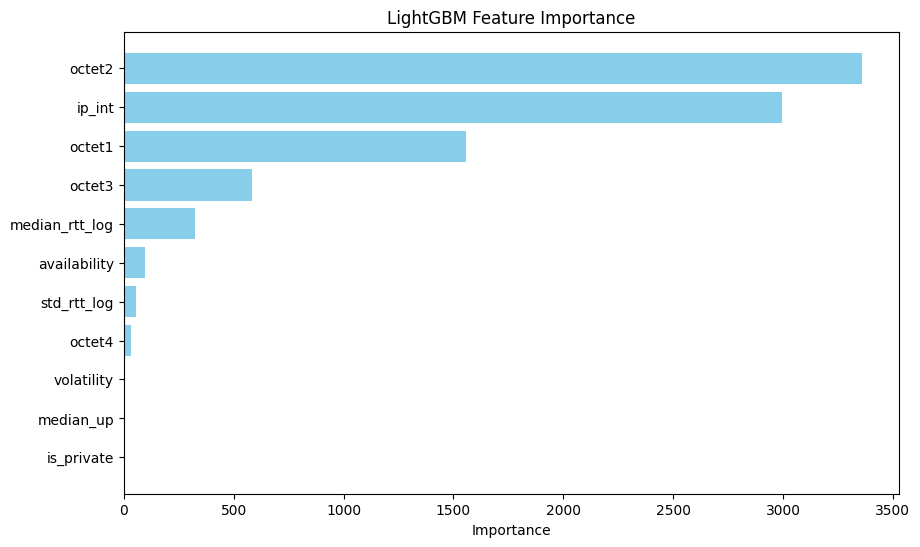

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Get importance scores from the classifier.
feature_importance = clf.feature_importances_

# Create a DataFrame for easy viewing.
fi_df = pd.DataFrame({
    'feature': features,  # 'features' is the list of feature names used for training
    'importance': feature_importance
}).sort_values(by='importance', ascending=False)

print("Feature Importances:")
print(fi_df)

# Plot the feature importance.
plt.figure(figsize=(10, 6))
plt.barh(fi_df['feature'], fi_df['importance'], color='skyblue')
plt.gca().invert_yaxis()  # Highest importance at the top.
plt.xlabel("Importance")
plt.title("LightGBM Feature Importance")
plt.show()


In [15]:
df = pd.read_csv("chunk1_aa_labeled.csv")
df.head()

/var/folders/zp/mnxlykzj0f1_gg0bt_rcd83c0000gn/T/ipykernel_8849/3363998075.py:1: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("chunk1_aa_labeled.csv")


,probe_addr,availability,volatility,median_up,median_rtt,std_rtt,hostname,extracted_router,label
0,--------,0.982891,0.028091,0.0,0.0,74734.566234,NaN,NaN,unresolved
1,1.0.137.0,0.000000,0.500000,NaN,0.0,0.000000,node-1s0.pool-1-0.dynamic.totinternet.net,node-1s0.pool-1-0.dynamic.totinternet.net,DHCP/NAT
2,1.0.137.1,1.000000,0.500000,0.0,225786.0,79.195959,node-1s1.pool-1-0.dynamic.totinternet.net,node-1s1.pool-1-0.dynamic.totinternet.net,DHCP/NAT
3,1.0.137.10,0.000000,0.500000,NaN,0.0,0.000000,node-1sa.pool-1-0.dynamic.totinternet.net,node-1sa.pool-1-0.dynamic.totinternet.net,DHCP/NAT
4,1.0.137.100,0.000000,0.500000,NaN,0.0,0.000000,node-1us.pool-1-0.dynamic.nt-isp.net,node-1us.pool-1-0.dynamic.nt-isp.net,DHCP/NAT


In [16]:
import pandas as pd

# Load the labeled file, reading only 'probe_addr' and 'hostname'.
df_labeled = pd.read_csv("chunk1_aa_labeled.csv", usecols=["probe_addr", "hostname"])

# Load the IP features file.
df_ip = pd.read_csv("chunk1_aa_final_IPFeatures.csv")

# Merge the 'hostname' column from df_labeled into df_ip based on 'probe_addr'.
# We're using a left join so that every row in df_ip keeps its row.
df_merged = pd.merge(df_ip, df_labeled, on="probe_addr", how="left")

# Save the merged DataFrame to a new CSV file.
output_file = "chunk1_aa_final_IPFeatures_with_hostname.csv"
df_merged.to_csv(output_file, index=False)

print(f"Merged output saved to {output_file}")


/var/folders/zp/mnxlykzj0f1_gg0bt_rcd83c0000gn/T/ipykernel_8849/1301885781.py:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_labeled = pd.read_csv("chunk1_aa_labeled.csv", usecols=["probe_addr", "hostname"])


Merged output saved to chunk1_aa_final_IPFeatures_with_hostname.csv


In [17]:
import pandas as pd

# Sample function to extract components from a hostname.
def parse_hostname(hostname):
    """
    Parse a hostname and return a dictionary with extracted tokens.
    Expected example format: 'node-1s0.pool-1-0.dynamic.totinternet.net'
    The function will extract:
        - node_id: The first part (e.g., "node-1s0")
        - pool: The second part (e.g., "pool-1-0")
        - type: The third part (e.g., "dynamic")
        - domain: The remaining parts joined (e.g., "totinternet.net")
    If hostname is empty or does not meet expectations, return empty strings.
    """
    if not isinstance(hostname, str) or hostname.strip() == "":
        return {"node_id": "", "pool": "", "type": "", "domain": ""}
    
    parts = hostname.split('.')
    if len(parts) < 4:
        # Not enough parts – return as much as possible
        return {"node_id": parts[0] if len(parts) > 0 else "",
                "pool": parts[1] if len(parts) > 1 else "",
                "type": parts[2] if len(parts) > 2 else "",
                "domain": '.'.join(parts[3:]) if len(parts) > 3 else ""}
    return {
        "node_id": parts[0],
        "pool": parts[1],
        "type": parts[2],
        "domain": '.'.join(parts[3:])
    }

# Load your CSV file.
df = pd.read_csv("chunk1_aa_final_IPFeatures_with_hostname.csv")

# Apply parse_hostname to create new columns. 
# (Here, you can drop or keep the original hostname column as needed.)
parsed = df["hostname"].apply(parse_hostname)
parsed_df = pd.DataFrame(parsed.tolist())

# You now have new columns: node_id, pool, type, and domain.
# Merge these columns back into the original DataFrame.
df = pd.concat([df, parsed_df], axis=1)

# For example, you could now see the distribution for each feature.
print("Unique node_id values:")
print(df["node_id"].value_counts().head())

print("\nUnique pool values:")
print(df["pool"].value_counts().head())

print("\nUnique type values:")
print(df["type"].value_counts())

print("\nUnique domain values:")
print(df["domain"].value_counts())

# Optionally, save the DataFrame with new features to a new file.
df.to_csv("chunk1_aa_final2.csv", index=False)


Unique node_id values:
node_id
          4917955
static      47474
hn          26608
85          18715
83          15369
Name: count, dtype: int64

Unique pool values:
pool
         4930847
res       230117
hsd1      211116
bbtec     171884
dip0      166336
Name: count, dtype: int64

Unique type values:
type
               4951570
net             420042
com             328672
spectrum        298648
t-ipconnect     166336
                ...   
101-30               1
102-30               1
103-30               1
104-30               1
lo343723             1
Name: count, Length: 16529, dtype: int64

Unique domain values:
domain
                   5661554
com                 548856
net                 508617
comcast.net         211209
de                  190427
                    ...   
128.varnion.com          1
129.varnion.com          1
13.varnion.com           1
130.varnion.com          1
18.primary.net           1
Name: count, Length: 80524, dtype: int64


In [18]:
df.columns

Index(['probe_addr', 'availability', 'volatility', 'median_up', 'median_rtt',
       'std_rtt', 'label', 'ip_int', 'octet1', 'octet2', 'octet3', 'octet4',
       'is_private', 'hostname', 'node_id', 'pool', 'type', 'domain'],
      dtype='object')

In [20]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the processed CSV file with extra IP-derived and hostname-derived features.
df = pd.read_csv("chunk1_aa_final2.csv")

# Drop rows with the label "error" (if any).
df = df[df["label"] != "error"]

# Map 'unknown' to 'static/commercial'
df["label"] = df["label"].replace({"unknown": "static/commercial"})

print("Label distribution after merging 'unknown' with 'static/commercial':")
print(df["label"].value_counts())

# Apply a log transformation to reduce skew for RTT features.
df["median_rtt_log"] = np.log1p(df["median_rtt"])
df["std_rtt_log"] = np.log1p(df["std_rtt"])

# For the hostname-derived features, convert them to numeric via label encoding.
additional_features = ["node_id", "pool", "type", "domain"]
for col in additional_features:
    le_col = LabelEncoder()
    # Make sure to cast the column to string
    df[col + "_enc"] = le_col.fit_transform(df[col].astype(str))

# Define a feature set including your behavioral features, IP-derived features,
# and the new encoded hostname features.
features = [
    "availability", 
    "volatility", 
    "median_up", 
    "median_rtt_log", 
    "std_rtt_log",
    "ip_int",
    "octet1", 
    "octet2", 
    "octet3", 
    "octet4",
    "is_private",
    "node_id_enc",
    "pool_enc",
    "type_enc",
    "domain_enc"
]

X = df[features]
y = df["label"]

# Encode the target labels.
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data using stratification.
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Create a LightGBM classifier with balanced class weights.
clf = lgb.LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    num_leaves=31,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

# Train the model (early stopping will stop if no improvement in 10 rounds).
clf.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)]
)

# Predict and evaluate.
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Optionally, view feature importances:
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': clf.feature_importances_
}).sort_values(by='importance', ascending=False)
print("Feature Importances:")
print(feature_importance)


/var/folders/zp/mnxlykzj0f1_gg0bt_rcd83c0000gn/T/ipykernel_8849/3444565062.py:9: DtypeWarning: Columns (13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("chunk1_aa_final2.csv")


Label distribution after merging 'unknown' with 'static/commercial':
label
unresolved           4917953
static/commercial    4758305
DHCP/NAT              801772
Name: count, dtype: int64
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.072714 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2707
[LightGBM] [Info] Number of data points in the train set: 8382424, number of used features: 13
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
Accuracy: 0.9894479210309571
Classification Report:
                   precision    recall  f1-score   support

         DHCP/NAT       0.88      0.99      0.94    160354
static/commercial       1.00      0.98      0.99    951661
       unresolved       1.00      1.00      1.00    983591

     

In [21]:
df.head()

,probe_addr,availability,volatility,median_up,median_rtt,std_rtt,label,ip_int,octet1,octet2,...,node_id,pool,type,domain,median_rtt_log,std_rtt_log,node_id_enc,pool_enc,type_enc,domain_enc
0,1.0.137.0,0,1,0,0.0,0,DHCP/NAT,16812288,1,0,...,node-1s0,pool-1-0,dynamic,totinternet.net,0.000000,0.000000,3244081,56369,10887,80182
1,1.0.137.1,1,1,0,225786.0,80,DHCP/NAT,16812289,1,0,...,node-1s1,pool-1-0,dynamic,totinternet.net,12.327347,4.394449,3244082,56369,10887,80182
2,1.0.137.10,0,1,0,0.0,0,DHCP/NAT,16812298,1,0,...,node-1sa,pool-1-0,dynamic,totinternet.net,0.000000,0.000000,3244091,56369,10887,80182
3,1.0.137.100,0,1,0,0.0,0,DHCP/NAT,16812388,1,0,...,node-1us,pool-1-0,dynamic,nt-isp.net,0.000000,0.000000,3244181,56369,10887,79490
4,1.0.137.101,0,1,0,0.0,0,DHCP/NAT,16812389,1,0,...,node-1ut,pool-1-0,dynamic,nt-isp.net,0.000000,0.000000,3244182,56369,10887,79490


In [22]:
df1 = pd.read_csv("chunk1_aa_final2.csv")
df1.head()

/var/folders/zp/mnxlykzj0f1_gg0bt_rcd83c0000gn/T/ipykernel_8849/3071441524.py:1: DtypeWarning: Columns (13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("chunk1_aa_final2.csv")


,probe_addr,availability,volatility,median_up,median_rtt,std_rtt,label,ip_int,octet1,octet2,octet3,octet4,is_private,hostname,node_id,pool,type,domain
0,1.0.137.0,0,1,0,0.0,0,DHCP/NAT,16812288,1,0,137,0,0,node-1s0.pool-1-0.dynamic.totinternet.net,node-1s0,pool-1-0,dynamic,totinternet.net
1,1.0.137.1,1,1,0,225786.0,80,DHCP/NAT,16812289,1,0,137,1,0,node-1s1.pool-1-0.dynamic.totinternet.net,node-1s1,pool-1-0,dynamic,totinternet.net
2,1.0.137.10,0,1,0,0.0,0,DHCP/NAT,16812298,1,0,137,10,0,node-1sa.pool-1-0.dynamic.totinternet.net,node-1sa,pool-1-0,dynamic,totinternet.net
3,1.0.137.100,0,1,0,0.0,0,DHCP/NAT,16812388,1,0,137,100,0,node-1us.pool-1-0.dynamic.nt-isp.net,node-1us,pool-1-0,dynamic,nt-isp.net
4,1.0.137.101,0,1,0,0.0,0,DHCP/NAT,16812389,1,0,137,101,0,node-1ut.pool-1-0.dynamic.nt-isp.net,node-1ut,pool-1-0,dynamic,nt-isp.net


In [24]:
df1["type"].nunique()

16527

In [25]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the processed CSV file with extra IP-derived and hostname-derived features.
df = pd.read_csv("chunk1_aa_final2.csv")

# Drop rows with the label "error" (if any).
df = df[df["label"] != "error"]

# Map 'unknown' to 'static/commercial'
df["label"] = df["label"].replace({"unknown": "static/commercial"})

print("Label distribution after merging 'unknown' with 'static/commercial':")
print(df["label"].value_counts())

# Apply a log transformation to reduce skew for RTT features.
df["median_rtt_log"] = np.log1p(df["median_rtt"])
df["std_rtt_log"] = np.log1p(df["std_rtt"])

# For the hostname-derived features, convert them to numeric via label encoding.
additional_features = ["node_id", "pool", "type", "domain"]
for col in additional_features:
    le_col = LabelEncoder()
    # Make sure to cast the column to string
    df[col + "_enc"] = le_col.fit_transform(df[col].astype(str))

# Define a feature set including your behavioral features, IP-derived features,
# and the new encoded hostname features.
features = [
    "availability", 
    "volatility", 
    "median_up", 
    "median_rtt_log", 
    "std_rtt_log",
    "ip_int",
    "octet1", 
    "octet2", 
    "octet3", 
    "octet4",
    "domain_enc"
]

X = df[features]
y = df["label"]

# Encode the target labels.
le = LabelEncoder()x
y_encoded = le.fit_transform(y)

# Split data using stratification.
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Create a LightGBM classifier with balanced class weights.
clf = lgb.LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    num_leaves=31,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

# Train the model (early stopping will stop if no improvement in 10 rounds).
clf.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)]
)

# Predict and evaluate.
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Optionally, view feature importances:
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': clf.feature_importances_
}).sort_values(by='importance', ascending=False)
print("Feature Importances:")
print(feature_importance)


/var/folders/zp/mnxlykzj0f1_gg0bt_rcd83c0000gn/T/ipykernel_8849/1400888798.py:9: DtypeWarning: Columns (13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("chunk1_aa_final2.csv")


Label distribution after merging 'unknown' with 'static/commercial':
label
unresolved           4917953
static/commercial    4758305
DHCP/NAT              801772
Name: count, dtype: int64
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.067762 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1944
[LightGBM] [Info] Number of data points in the train set: 8382424, number of used features: 10
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
Accuracy: 0.9030886531151371
Classification Report:
                   precision    recall  f1-score   support

         DHCP/NAT       0.62      0.93      0.75    160354
static/commercial       0.99      0.80      0.88    951661
       unresolved       0.91      1.00      0.95    983591

     

In [26]:
# Example: shift threshold for DHCP/NAT only
proba = clf.predict_proba(X_test)
dhcp_idx = list(le.classes_).index("DHCP/NAT")
y_pred_adj = y_pred.copy()
y_pred_adj[(proba[:, dhcp_idx] < 0.55) & (y_pred == dhcp_idx)] =  (
        proba[(proba[:, dhcp_idx] < 0.55)].argmax(axis=1)
)

print(classification_report(y_test, y_pred_adj, target_names=le.classes_))


ValueError: NumPy boolean array indexing assignment cannot assign 1880797 input values to the 25165 output values where the mask is true

In [30]:
import numpy as np
from sklearn.metrics import classification_report

# index of the DHCP/NAT class in predict_proba’s columns
dhcp_idx = list(le.classes_).index("DHCP/NAT")

# copy the original predictions
y_pred_adj = y_pred.copy()

# --- 1️⃣  build a mask: rows where we predicted DHCP/NAT but its prob < 0.55
mask = (y_pred == dhcp_idx) & (proba[:, dhcp_idx] < 0.55)

# --- 2️⃣  for those rows, pick the highest‑prob *other* class ---------------
# take a copy of the prob matrix for masked rows only
proba_masked = proba[mask].copy()

# set DHCP column to ‑inf so argmax ignores it
proba_masked[:, dhcp_idx] = -np.inf

# best alternative class for each masked row
alt_preds = proba_masked.argmax(axis=1)

# --- 3️⃣  assign back
y_pred_adj[mask] = alt_preds

# --- 4️⃣  new metrics
print(classification_report(y_test, y_pred_adj, target_names=le.classes_))


                   precision    recall  f1-score   support

         DHCP/NAT       0.68      0.91      0.78    160354
static/commercial       0.98      0.82      0.90    951661
       unresolved       0.91      1.00      0.95    983591

         accuracy                           0.91   2095606
        macro avg       0.86      0.91      0.87   2095606
     weighted avg       0.92      0.91      0.91   2095606



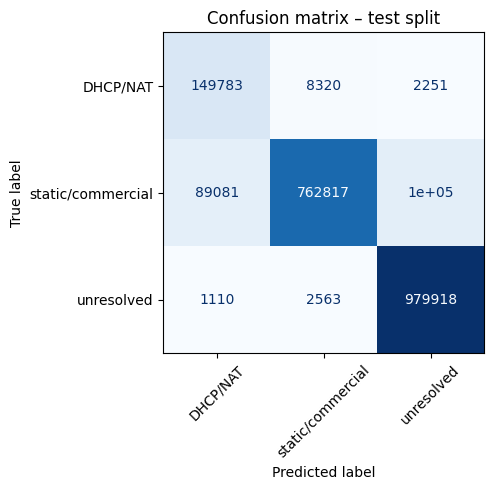

Top‑5 rows (most confident wrong DHCP/NAT):


,availability,volatility,median_up,median_rtt_log,std_rtt_log,ip_int,octet1,octet2,octet3,octet4,domain_enc,true_label,pred_prob_DHCP
9064937,1,1,0,12.038518,0.000000,1380958844,82,79,194,124,79691,static/commercial,0.978566
3291725,1,1,0,10.916415,7.611842,3180098593,189,140,116,33,79240,static/commercial,0.977643
3291628,1,1,0,10.928068,8.268732,3180098736,189,140,116,176,79240,static/commercial,0.977643
3291587,1,1,0,11.110319,6.754604,3180098699,189,140,116,139,79240,static/commercial,0.977643
3291723,1,1,0,10.931409,6.733402,3180098591,189,140,116,31,79240,static/commercial,0.977643



Most common first octet (octet1) among false DHCP/NAT:
octet1
189    43
82     32
187    24
83      1
Name: count, dtype: int64


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1️⃣  Confusion‑matrix heat‑map
cm = confusion_matrix(y_test, y_pred, labels=le.transform(le.classes_))
fig, ax = plt.subplots(figsize=(6, 5))
disp = ConfusionMatrixDisplay(cm, display_labels=le.classes_)
disp.plot(cmap="Blues", ax=ax, colorbar=False, xticks_rotation=45)
ax.set_title("Confusion matrix – test split")
plt.tight_layout()
plt.show()

# 2️⃣  Top‑100 false‑positive DHCP/NAT samples
dhcp_idx = list(le.classes_).index("DHCP/NAT")

# Boolean mask: predicted DHCP/NAT but truth ≠ DHCP/NAT
fp_mask = (y_pred == dhcp_idx) & (y_test != dhcp_idx)
fp_idx   = np.where(fp_mask)[0]

# Build a convenient DataFrame
fp_df = X_test.iloc[fp_idx].copy()
fp_df["true_label"]     = le.inverse_transform(y_test[fp_idx])
fp_df["pred_prob_DHCP"] = proba[fp_idx, dhcp_idx]

top100_fp = fp_df.sort_values("pred_prob_DHCP", ascending=False).head(100)
top100_fp.to_csv("top100_false_positive_dhcp.csv", index=False)   # optional

print("Top‑5 rows (most confident wrong DHCP/NAT):")
display(top100_fp.head())

# 3️⃣  Quick pattern hunt -------------------------------------------------
# Top SLD (second‑level domain) counts
if "domain" in top100_fp.columns:
    top100_fp["sld"] = top100_fp["domain"].str.split(".").str[-2]
    print("\nMost common SLDs among false DHCP/NAT:")
    print(top100_fp["sld"].value_counts().head(10))

# Which /8 or /16 blocks dominate?
print("\nMost common first octet (octet1) among false DHCP/NAT:")
print(top100_fp["octet1"].value_counts().head(10))

# Visual bar‑plot of domains (optional)
if "sld" in top100_fp.columns:
    plt.figure(figsize=(8,4))
    sns.countplot(y="sld", data=top100_fp, order=top100_fp["sld"].value_counts().head(10).index)
    plt.title("Top‑10 SLDs in false DHCP/NAT predictions")
    plt.xlabel("Count (out of top‑100 FP)")
    plt.ylabel("Second‑level domain")
    plt.tight_layout()
    plt.show()


In [32]:
suspicious_id = 79240
print(df.loc[df["domain_enc"] == suspicious_id, "domain"].unique()[:10])


['mx']


In [33]:
df["subnet_16"] = (df["ip_int"] >> 16).astype("category")
features.append("subnet_16")


TypeError: unsupported operand type(s) for >>: 'Series' and 'int'

In [34]:
mask_mx = df["domain"] == "mx"
print("Rows with domain 'mx':", mask_mx.sum())

# How are they labelled?
print(df.loc[mask_mx, "label"].value_counts())


Rows with domain 'mx': 102512
label
DHCP/NAT             83654
static/commercial    18858
Name: count, dtype: int64


In [36]:
# 0️⃣  (Optional) see how many rows you’re about to drop
n_drop = (df["domain"] == "mx").sum()
print(f"Dropping {n_drop:,} rows where domain == 'mx'")

# 1️⃣  Drop them
df = df[df["domain"] != "mx"].reset_index(drop=True)


# 4️⃣  Re‑define X and y
X = df[features]          # features is your updated list
y = df["label"]

# 5️⃣  Encode labels, train‑test split, retrain LightGBM, etc.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_enc = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)

clf = lgb.LGBMClassifier(
    n_estimators=300,
    learning_rate=0.05,
    num_leaves=63,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)
clf.fit(X_train, y_train, eval_set=[(X_test, y_test)])

y_pred  = clf.predict(X_test)
proba   = clf.predict_proba(X_test)

from sklearn.metrics import classification_report, accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))


Dropping 0 rows where domain == 'mx'
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.063776 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1939
[LightGBM] [Info] Number of data points in the train set: 8300414, number of used features: 10
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
Accuracy: 0.948009352784246
                   precision    recall  f1-score   support

         DHCP/NAT       0.84      0.99      0.91    143624
static/commercial       1.00      0.89      0.94    947889
       unresolved       0.93      1.00      0.96    983591

         accuracy                           0.95   2075104
        macro avg       0.92      0.96      0.94   2075104
     weighted avg       0.95      0.95      0.95   2075104



                   precision    recall  f1-score   support

         DHCP/NAT       0.88      0.98      0.93    143624
static/commercial       1.00      0.90      0.94    947889
       unresolved       0.93      1.00      0.96    983591

         accuracy                           0.95   2075104
        macro avg       0.93      0.96      0.94   2075104
     weighted avg       0.95      0.95      0.95   2075104



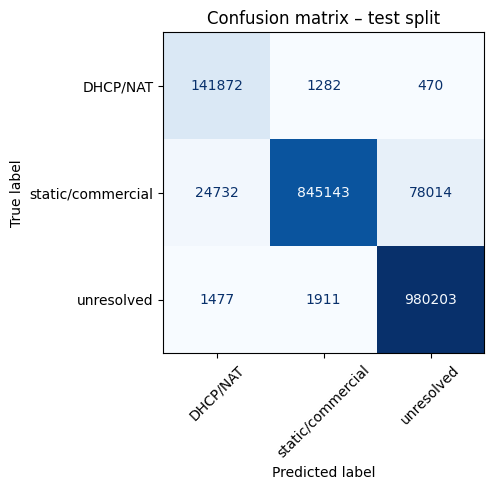

Top‑5 rows (most confident wrong DHCP/NAT):


,availability,volatility,median_up,median_rtt_log,std_rtt_log,ip_int,octet1,octet2,octet3,octet4,domain_enc,true_label,pred_prob_DHCP
9073531,1,1,0,12.063212,10.001476,1396189052,83,56,39,124,79842,static/commercial,0.986766
9073681,1,1,0,12.040803,0.000000,1396188931,83,56,39,3,79842,static/commercial,0.986161
9073737,1,1,0,11.989880,6.398595,1396189008,83,56,39,80,79842,static/commercial,0.985520
9073646,1,1,0,11.980012,5.135798,1396189156,83,56,39,228,79842,static/commercial,0.985395
9073640,1,1,0,11.986628,1.945910,1396189150,83,56,39,222,79842,static/commercial,0.985395



Most common first octet (octet1) among false DHCP/NAT:
octet1
83     41
171    18
114     8
68      7
94      5
85      4
97      3
89      2
45      2
50      2
Name: count, dtype: int64


In [37]:
import numpy as np
from sklearn.metrics import classification_report

# index of the DHCP/NAT class in predict_proba’s columns
dhcp_idx = list(le.classes_).index("DHCP/NAT")

# copy the original predictions
y_pred_adj = y_pred.copy()

# --- 1️⃣  build a mask: rows where we predicted DHCP/NAT but its prob < 0.55
mask = (y_pred == dhcp_idx) & (proba[:, dhcp_idx] < 0.55)

# --- 2️⃣  for those rows, pick the highest‑prob *other* class ---------------
# take a copy of the prob matrix for masked rows only
proba_masked = proba[mask].copy()

# set DHCP column to ‑inf so argmax ignores it
proba_masked[:, dhcp_idx] = -np.inf

# best alternative class for each masked row
alt_preds = proba_masked.argmax(axis=1)

# --- 3️⃣  assign back
y_pred_adj[mask] = alt_preds

# --- 4️⃣  new metrics
print(classification_report(y_test, y_pred_adj, target_names=le.classes_))
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1️⃣  Confusion‑matrix heat‑map
cm = confusion_matrix(y_test, y_pred, labels=le.transform(le.classes_))
fig, ax = plt.subplots(figsize=(6, 5))
disp = ConfusionMatrixDisplay(cm, display_labels=le.classes_)
disp.plot(cmap="Blues", ax=ax, colorbar=False, xticks_rotation=45)
ax.set_title("Confusion matrix – test split")
plt.tight_layout()
plt.show()

# 2️⃣  Top‑100 false‑positive DHCP/NAT samples
dhcp_idx = list(le.classes_).index("DHCP/NAT")

# Boolean mask: predicted DHCP/NAT but truth ≠ DHCP/NAT
fp_mask = (y_pred == dhcp_idx) & (y_test != dhcp_idx)
fp_idx   = np.where(fp_mask)[0]

# Build a convenient DataFrame
fp_df = X_test.iloc[fp_idx].copy()
fp_df["true_label"]     = le.inverse_transform(y_test[fp_idx])
fp_df["pred_prob_DHCP"] = proba[fp_idx, dhcp_idx]

top100_fp = fp_df.sort_values("pred_prob_DHCP", ascending=False).head(100)
top100_fp.to_csv("top100_false_positive_dhcp.csv", index=False)   # optional

print("Top‑5 rows (most confident wrong DHCP/NAT):")
display(top100_fp.head())

# 3️⃣  Quick pattern hunt -------------------------------------------------
# Top SLD (second‑level domain) counts
if "domain" in top100_fp.columns:
    top100_fp["sld"] = top100_fp["domain"].str.split(".").str[-2]
    print("\nMost common SLDs among false DHCP/NAT:")
    print(top100_fp["sld"].value_counts().head(10))

# Which /8 or /16 blocks dominate?
print("\nMost common first octet (octet1) among false DHCP/NAT:")
print(top100_fp["octet1"].value_counts().head(10))

# Visual bar‑plot of domains (optional)
if "sld" in top100_fp.columns:
    plt.figure(figsize=(8,4))
    sns.countplot(y="sld", data=top100_fp, order=top100_fp["sld"].value_counts().head(10).index)
    plt.title("Top‑10 SLDs in false DHCP/NAT predictions")
    plt.xlabel("Count (out of top‑100 FP)")
    plt.ylabel("Second‑level domain")
    plt.tight_layout()
    plt.show()


In [39]:
suspicious_id = 79842
print(df.loc[df["domain_enc"] == suspicious_id, "domain"].unique()[:10])
mask_rima = df["domain"] == "rima-tde.net"
print("Rows with rima‑tde:", mask_rima.sum())
print(df.loc[mask_rima, "label"].value_counts())

['rima-tde.net']
Rows with rima‑tde: 92604
label
DHCP/NAT             69626
static/commercial    22978
Name: count, dtype: int64


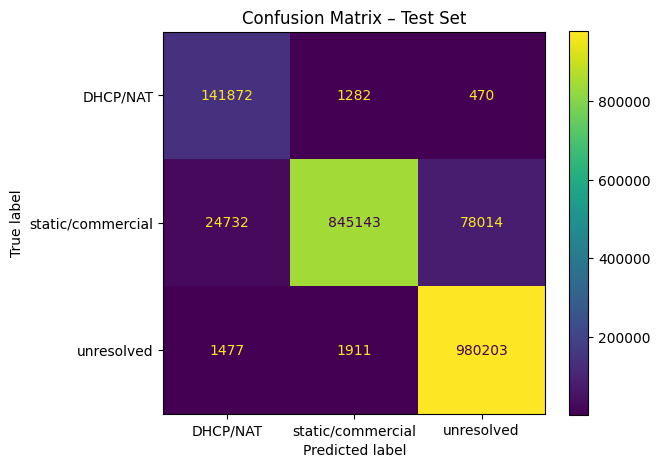

<Figure size 640x480 with 0 Axes>

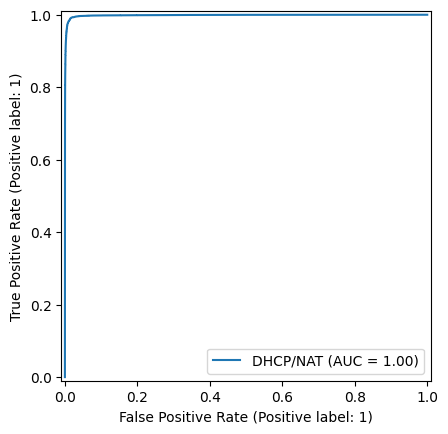

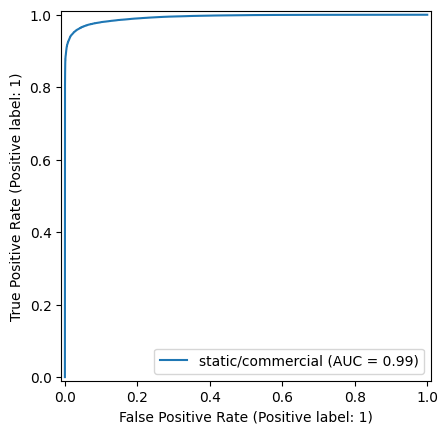

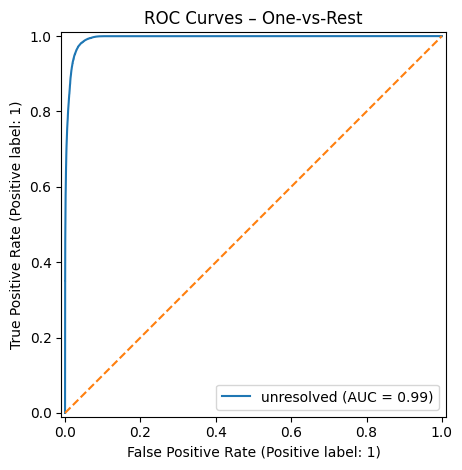

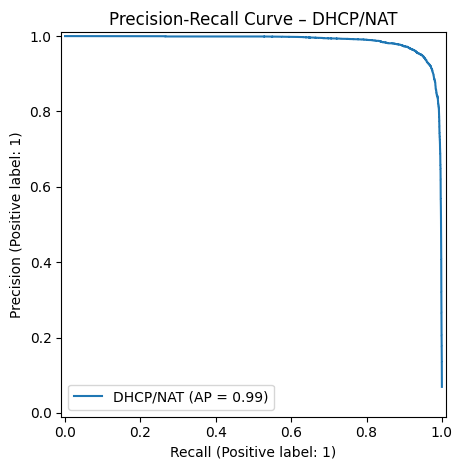

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay

# 1️⃣ Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred, labels=range(len(le.classes_)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot()
plt.title("Confusion Matrix – Test Set")
plt.tight_layout()
plt.show()

# 2️⃣ ROC Curves for Each Class
plt.figure()
for i, cls in enumerate(le.classes_):
    RocCurveDisplay.from_predictions((y_test == i), proba[:, i], name=cls)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Curves – One‑vs‑Rest")
plt.legend()
plt.tight_layout()
plt.show()

# 3️⃣ Precision‑Recall Curve for DHCP/NAT
dhcp_idx = list(le.classes_).index("DHCP/NAT")
PrecisionRecallDisplay.from_predictions((y_test == dhcp_idx), proba[:, dhcp_idx], name="DHCP/NAT")
plt.title("Precision‑Recall Curve – DHCP/NAT")
plt.tight_layout()
plt.show()


In [49]:

# Optionally, view feature importances:
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': clf.feature_importances_
}).sort_values(by='importance', ascending=False)
print("Feature Importances:")
print(feature_importance)


Feature Importances:
           feature  importance
7           octet2       17025
5           ip_int       13860
10      domain_enc        9748
8           octet3        9167
6           octet1        4157
3   median_rtt_log        1156
0     availability         295
9           octet4         282
4      std_rtt_log         110
1       volatility           0
2        median_up           0


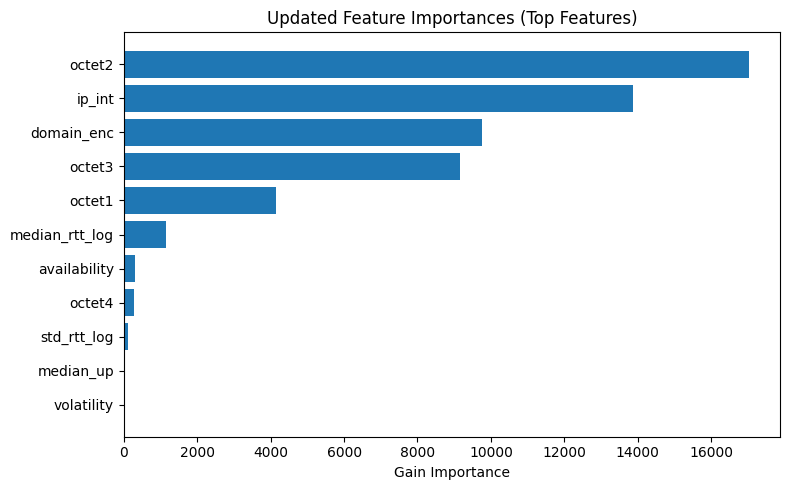

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Updated Feature Importances
fi_data = {
    "feature": [
        "octet2", "ip_int", "domain_enc", "octet3", "octet1",
        "median_rtt_log", "availability", "octet4", "std_rtt_log",
        "volatility", "median_up"
    ],
    "importance": [17025, 13860, 9748, 9167, 4157, 1156, 295, 282, 110, 0, 0]
}

# Create DataFrame and sort
df_fi = pd.DataFrame(fi_data).sort_values("importance", ascending=True)

# Plot horizontal bar chart
plt.figure(figsize=(8, 5))
plt.barh(df_fi["feature"], df_fi["importance"])
plt.xlabel("Gain Importance")
plt.title("Updated Feature Importances (Top Features)")
plt.tight_layout()
plt.show()


In [62]:
pip install geolite2 --user

ERROR: Could not find a version that satisfies the requirement geolite2 (from versions: none)
ERROR: No matching distribution found for geolite2
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [61]:
from geolite2 import geolite2
reader = geolite2.reader()   # automatically finds/updates the database

def ip2latlon(ip_int):
    try:
        rec = reader.get(str(ipaddress.IPv4Address(int(ip_int))))
        return rec["location"]["latitude"], rec["location"]["longitude"]
    except:
        return None, None


ModuleNotFoundError: No module named 'geolite2'

In [ ]:
import glob
import pandas as pd

# 1. Find all the files matching chunk*_aa*
files = glob.glob("chunk*_aa*.csv")

# 2–3. Read & concatenate
df = pd.concat(
    (pd.read_csv(fname) for fname in files),
    ignore_index=True
)

# 4. Aggregate by probe_addr (mean over the two‑week period)
agg = (
    df
    .groupby("probe_addr", as_index=False)
    .mean()
)

# 5. Save to CSV
agg.to_csv("aggregated.csv", index=False)

print(f"Wrote aggregated data for {len(agg)} unique probe_addr entries to aggregated.csv")


In [64]:
pip install dask


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.2 MB 3.5 MB/s eta 0:00:01
     |████████████████████████████████| 56 kB 8.6 MB/s  eta 0:00:01
     |████████████████████████████████| 194 kB 80.9 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 26.7 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [68]:
import glob, os
import dask.dataframe as dd
import numpy as np

pattern = "chunk*_aa*"
cols    = ["probe_addr","availability","volatility","median_up","median_rtt","std_rtt"]
dtypes  = {
    "probe_addr":  "object",
    "availability":"float64",
    "volatility":  "float64",
    "median_up":   "float64",
    "median_rtt":  "float64",
    "std_rtt":     "float64",
}

for path in glob.glob(pattern):
    # 1) Read in moderately‐sized blocks
    df = dd.read_csv(path, usecols=cols, dtype=dtypes, blocksize="256MB")

    # 2) Replace NaN/inf with 0, then ceil+cast
    for feat in cols[1:]:
        df[feat] = (
            df[feat]
            .map_partitions(lambda s: s.replace([np.inf, -np.inf], 0).fillna(0), 
                            meta=(feat,"float64"))
            .map_partitions(lambda s: np.ceil(s).astype("int32"),
                            meta=(feat,"int32"))
        )

    # 3) Write back out to a temp file, rename atomically
    tmp = path + ".tmp"
    df.to_csv(tmp, single_file=True, index=False)
    os.replace(tmp, path)

# …then your existing combine/group‐by/sum step…


In [69]:
df.head()

,probe_addr,availability,volatility,median_up,median_rtt,std_rtt
0,--------,1,1,0,0,60601
1,1.0.137.0,0,1,0,0,0
2,1.0.137.1,1,1,0,228427,241
3,1.0.137.10,0,1,0,0,0
4,1.0.137.100,0,1,0,0,0


In [75]:
ls

chunk10_aa     chunk2_aa.csv  chunk5_aa      chunk8_aa
chunk11_aa     chunk3_aa      chunk6_aa      chunk9_aa
chunk1_aa.csv  chunk4_aa      chunk7_aa      final/


In [77]:
import dask.dataframe as dd
import numpy as np

# 1) Read all your chunk files in
cols = ["probe_addr","availability","volatility","median_up","median_rtt","std_rtt"]
dtypes = {c: "int32" for c in cols if c!="probe_addr"}
dtypes["probe_addr"] = "object"

df = dd.read_csv(
    "chunk*_aa*",
    usecols=["probe_addr","availability","volatility","median_up","median_rtt","std_rtt"],
    dtype={
        "probe_addr": "object",
        "availability": "int32",
        "volatility":   "int32",
        "median_up":    "int32",
        "median_rtt":   "int32",
        "std_rtt":      "int32",
    },
    blocksize="256MB",
)

# 2) Compute per‑address mean
# Note: Dask’s mean will produce floats; we’ll ceil() and convert below.
agg = df.groupby("probe_addr").mean().reset_index()

# 3) Round each feature up to the next integer and cast
def round_and_cast(df):
    for feat in ["availability","volatility","median_up","median_rtt","std_rtt"]:
        # ceil then cast to int32
        df[feat] = np.ceil(df[feat]).astype("int32")
    return df

agg = agg.map_partitions(round_and_cast, meta=agg._meta)

# 4) Coalesce to one partition so we write a single CSV
agg = agg.repartition(npartitions=1)

# 5) Write out!
agg.to_csv(
    "aggregate_data.csv",
    index=False,
    single_file=True,
)

# (Optional) If you’d rather Parquet, replace the last step with:
# agg.to_parquet("aggregate_data.parquet", engine="pyarrow", compression="snappy")


['/Users/chandni/Downloads/USC/dsci599/project/data/aggregate_data.csv']

In [78]:
ag = pd.read_csv("aggregate_data.csv")
ag.head()

,probe_addr,availability,volatility,median_up,median_rtt,std_rtt
0,--------,1,1,0,0,59149
1,1.0.137.0,0,1,0,0,0
2,1.0.137.1,1,1,0,252564,31638
3,1.0.137.10,0,1,0,0,49288
4,1.0.137.100,0,1,0,0,0


In [81]:
df1 = pd.read_csv("chunk1_aa_final2.csv")
df1.head()

/var/folders/zp/mnxlykzj0f1_gg0bt_rcd83c0000gn/T/ipykernel_8849/3071441524.py:1: DtypeWarning: Columns (13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("chunk1_aa_final2.csv")


,probe_addr,availability,volatility,median_up,median_rtt,std_rtt,label,ip_int,octet1,octet2,octet3,octet4,is_private,hostname,node_id,pool,type,domain
0,1.0.137.0,0,1,0,0.0,0,DHCP/NAT,16812288,1,0,137,0,0,node-1s0.pool-1-0.dynamic.totinternet.net,node-1s0,pool-1-0,dynamic,totinternet.net
1,1.0.137.1,1,1,0,225786.0,80,DHCP/NAT,16812289,1,0,137,1,0,node-1s1.pool-1-0.dynamic.totinternet.net,node-1s1,pool-1-0,dynamic,totinternet.net
2,1.0.137.10,0,1,0,0.0,0,DHCP/NAT,16812298,1,0,137,10,0,node-1sa.pool-1-0.dynamic.totinternet.net,node-1sa,pool-1-0,dynamic,totinternet.net
3,1.0.137.100,0,1,0,0.0,0,DHCP/NAT,16812388,1,0,137,100,0,node-1us.pool-1-0.dynamic.nt-isp.net,node-1us,pool-1-0,dynamic,nt-isp.net
4,1.0.137.101,0,1,0,0.0,0,DHCP/NAT,16812389,1,0,137,101,0,node-1ut.pool-1-0.dynamic.nt-isp.net,node-1ut,pool-1-0,dynamic,nt-isp.net


In [86]:
import dask.dataframe as dd
import numpy as np

# 1) Read your existing aggregate
agg = dd.read_csv("aggregate_data.csv", blocksize="256MB")

# 2) Read in just the columns you need from chunk1
df2 = dd.read_csv(
    "chunk1_aa_final2.csv",
    usecols=["probe_addr","label","ip_int","octet1","octet2","octet3","octet4","is_private","hostname","domain"],
    blocksize="256MB",
)

# drop any NaNs in probe_addr
agg = agg.dropna(subset=["probe_addr"])
df2 = df2.dropna(subset=["probe_addr"])

# shuffle/hash-partition them on probe_addr
agg = agg.shuffle(on="probe_addr")
df2 = df2.shuffle(on="probe_addr")

# reset_index so probe_addr is only a column, not also index
agg = agg.reset_index(drop=True)
df2 = df2.reset_index(drop=True)

# now the merge is unambiguous
merged = agg.merge(df2, how="left", on="probe_addr")

# write out
merged = merged.repartition(npartitions=1)
merged.to_csv("aggregate_data_with_meta.csv", index=False, single_file=True)


['/Users/chandni/Downloads/USC/dsci599/project/data/aggregate_data_with_meta.csv']

In [87]:
df1 = pd.read_csv("aggregate_data_with_meta.csv")
df1.head()

,probe_addr,availability,volatility,median_up,median_rtt,std_rtt,label,ip_int,octet1,octet2,octet3,octet4,is_private,hostname,domain
0,1.0.137.100,0,1,0,0,0,DHCP/NAT,16812388.0,1.0,0.0,137.0,100.0,0.0,node-1us.pool-1-0.dynamic.nt-isp.net,nt-isp.net
1,1.0.137.103,1,1,0,165858,0,DHCP/NAT,16812391.0,1.0,0.0,137.0,103.0,0.0,node-1uv.pool-1-0.dynamic.nt-isp.net,nt-isp.net
2,1.0.137.109,0,1,0,0,0,DHCP/NAT,16812397.0,1.0,0.0,137.0,109.0,0.0,node-1v1.pool-1-0.dynamic.totinternet.net,totinternet.net
3,1.0.137.11,0,1,0,0,0,DHCP/NAT,16812299.0,1.0,0.0,137.0,11.0,0.0,node-1sb.pool-1-0.dynamic.nt-isp.net,nt-isp.net
4,1.0.137.111,1,1,0,252701,0,DHCP/NAT,16812399.0,1.0,0.0,137.0,111.0,0.0,node-1v3.pool-1-0.dynamic.totinternet.net,totinternet.net


In [88]:
len(df1)

10480063

In [101]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the processed CSV file with extra IP-derived and hostname-derived features.
df = pd.read_csv("aggregate_data_with_meta.csv")

# Drop rows with the label "error" (if any).
df = df[df["label"] != "error"]

# Map 'unknown' to 'static/commercial'
df["label"] = df["label"].replace({"unknown": "static/commercial"})

print("Label distribution after merging 'unknown' with 'static/commercial':")
print(df["label"].value_counts())

# Apply a log transformation to reduce skew for RTT features.
df["median_rtt_log"] = np.log1p(df["median_rtt"])
df["std_rtt_log"] = np.log1p(df["std_rtt"])

# For the hostname-derived features, convert them to numeric via label encoding.
additional_features = [ "domain"]
for col in additional_features:
    le_col = LabelEncoder()
    # Make sure to cast the column to string
    df[col + "_enc"] = le_col.fit_transform(df[col].astype(str))

# Define a feature set including your behavioral features, IP-derived features,
# and the new encoded hostname features.
features = [
    "availability", 
    "volatility", 
    "median_up", 
    "median_rtt_log", 
    "std_rtt_log",
    "ip_int",
    "octet1", 
    "octet2", 
    "octet3", 
    "octet4",
    "domain_enc"
]

X = df[features]
y = df["label"]

# Encode the target labels.
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data using stratification.
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Create a LightGBM classifier with balanced class weights.
clf = lgb.LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    num_leaves=31,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

# Train the model (early stopping will stop if no improvement in 10 rounds).
clf.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)]
)

# Predict and evaluate.
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
# print(classification_report(y_test, y_pred, target_names=le.classes_))
print(classification_report(
    y_test,
    y_pred,
    target_names=list(map(str, le.classes_))
))

# Optionally, view feature importances:
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': clf.feature_importances_
}).sort_values(by='importance', ascending=False)
print("Feature Importances:")
print(feature_importance)


Label distribution after merging 'unknown' with 'static/commercial':
label
unresolved           4917953
static/commercial    4758305
DHCP/NAT              801772
Name: count, dtype: int64
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.061008 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1945
[LightGBM] [Info] Number of data points in the train set: 8384050, number of used features: 10
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Accuracy: 0.9093831956194928
Classification Report:
                   precision    recall  f1-score   support

         DHCP/NAT       0.65      0.94      0.77    16

In [100]:
print("Classification Report:")
print(classification_report(
    y_test,
    y_pred,
    target_names=list(map(str, le.classes_))
))

Classification Report:
                   precision    recall  f1-score   support

         DHCP/NAT       0.65      0.94      0.77    160354
static/commercial       0.99      0.81      0.89    951661
       unresolved       0.91      1.00      0.95    983591
              nan       1.00      1.00      1.00       407

         accuracy                           0.91   2096013
        macro avg       0.89      0.94      0.90   2096013
     weighted avg       0.92      0.91      0.91   2096013



In [102]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# 1) Load your merged, integer‑typed CSV
df = pd.read_csv("aggregate_data_with_meta.csv")

# 2) Clean up labels as before
df = df[df["label"] != "error"]
df["label"] = df["label"].replace({"unknown": "static/commercial"})

# 3) Optional log‑transform RTTs
df["median_rtt_log"] = np.log1p(df["median_rtt"])
df["std_rtt_log"]   = np.log1p(df["std_rtt"])

# 4) Encode your hostname/domain column
le_dom = LabelEncoder()
df["domain_enc"] = le_dom.fit_transform(df["domain"].astype(str))

# 5) Define features & target
features = [
    "availability",
    "volatility",
    "median_up",
    "median_rtt_log",
    "std_rtt_log",
    "ip_int",
    "octet1",
    "octet2",
    "octet3",
    "octet4",
    "domain_enc"
]
X = df[features]
y = LabelEncoder().fit_transform(df["label"])

# 6) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 7) Fit a single decision tree
dt = DecisionTreeClassifier(
    max_depth=4,       # shallow tree for interpretability
    min_samples_leaf=50,
    random_state=42
)
dt.fit(X_train, y_train)

# 8) Print the textual tree
r = export_text(dt, feature_names=features)
print(r)

# 9) (Optional) Plot it
plt.figure(figsize=(16, 10))
plot_tree(
    dt,
    feature_names=features,
    class_names=LabelEncoder().inverse_transform(np.arange(len(dt.classes_))),
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()


|--- domain_enc <= 79330.50
|   |--- domain_enc <= 79239.50
|   |   |--- domain_enc <= 76818.50
|   |   |   |--- ip_int <= 3653507072.00
|   |   |   |   |--- class: 1
|   |   |   |--- ip_int >  3653507072.00
|   |   |   |   |--- class: 0
|   |   |--- domain_enc >  76818.50
|   |   |   |--- domain_enc <= 78237.50
|   |   |   |   |--- class: 1
|   |   |   |--- domain_enc >  78237.50
|   |   |   |   |--- class: 1
|   |--- domain_enc >  79239.50
|   |   |--- octet1 <= 182.00
|   |   |   |--- class: 1
|   |   |--- octet1 >  182.00
|   |   |   |--- availability <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- availability >  0.50
|   |   |   |   |--- class: 0
|--- domain_enc >  79330.50
|   |--- domain_enc <= 79331.50
|   |   |--- ip_int <= 3557171328.00
|   |   |   |--- ip_int <= 1613676928.00
|   |   |   |   |--- class: 2
|   |   |   |--- ip_int >  1613676928.00
|   |   |   |   |--- class: 2
|   |   |--- ip_int >  3557171328.00
|   |   |   |--- ip_int <= 3695166976.00
|   |   |   |  

NotFittedError: This LabelEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

<Figure size 1600x1000 with 0 Axes>

In [103]:
cd ..


/Users/chandni/Downloads/USC/dsci599/project


/Users/chandni/Library/Python/3.9/lib/python/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [107]:
ls

chunk10_aa     chunk3_aa      chunk6_aa      chunk9_aa
chunk11_aa     chunk4_aa      chunk7_aa      chunk_aa.csv
chunk2_aa.csv  chunk5_aa      chunk8_aa


In [4]:
ls

chunk10_aa     chunk3_aa      chunk6_aa      chunk9_aa
chunk11_aa     chunk4_aa      chunk7_aa      chunk_aa.csv
chunk2_aa.csv  chunk5_aa      chunk8_aa


In [6]:
%%time
import pandas as pd, numpy as np, glob, math, gc
from collections import defaultdict, deque
from tqdm.auto import tqdm

RAW_COLS  = ['reply_type', 'time_s', 'rtt_us', 'ttl', 'probe_addr']
DTYPES    = {
    'reply_type': 'category',
    'rtt_us'    : 'float32',
    'probe_addr': 'string'
}
CHUNK_ROWS = 2_000_000
FILES      = sorted(glob.glob("chunk*aa*"))
OUTFILE    = "aggregate.csv"

# ---- rolling stats ----
tot_pings   = defaultdict(int)
succ_pings  = defaultdict(int)
up_periods  = defaultdict(int)
in_session  = defaultdict(bool)      # currently inside an up‑period?
session_start = defaultdict(int)     # epoch sec of current session start
durations   = defaultdict(list)      # list of completed up‑durations

rtt_sum, rtt_sum_sq, rtt_cnt = defaultdict(float), defaultdict(float), defaultdict(int)
last_ts    = defaultdict(int)        # detect cross‑file time disorder

def process_chunk(df):
    # minimal cleaning
    df['time_s'] = pd.to_numeric(df['time_s'], errors='coerce').astype('Int64')
    df.dropna(subset=['time_s'], inplace=True)
    df['time_s'] = df['time_s'].astype('int64')

    is_up = (df['reply_type'] == '0x0000')

    # iterate row‑wise but only light state updates
    for probe, up, ts, rtt in zip(df['probe_addr'], is_up, df['time_s'], df['rtt_us']):
        # guard against out‑of‑order packets spanning files
        if ts < last_ts[probe]:
            # simply skip; disorder rare in practice
            continue
        last_ts[probe] = ts

        tot_pings[probe] += 1
        if up:
            succ_pings[probe] += 1
            if not np.isnan(rtt):
                rtt_sum  [probe] += rtt
                rtt_sum_sq[probe] += rtt*rtt
                rtt_cnt  [probe] += 1

        # up‑session state machine
        if up and not in_session[probe]:
            in_session[probe]  = True
            session_start[probe] = ts
            up_periods[probe]  += 1
        elif not up and in_session[probe]:
            in_session[probe] = False
            durations[probe].append(ts - session_start[probe])

row_bar = tqdm(total=None, unit='rows', desc='Rows', dynamic_ncols=True)
for f in tqdm(FILES, desc='Files', dynamic_ncols=True):
    reader = pd.read_csv(
        f, sep='\t', names=RAW_COLS, usecols=range(len(RAW_COLS)),
        skiprows=5, header=None, dtype=DTYPES,
        chunksize=CHUNK_ROWS, on_bad_lines='skip'
    )
    for chunk in reader:
        process_chunk(chunk)
        row_bar.update(len(chunk))
        del chunk
        gc.collect()
row_bar.close()

# close any open sessions (use last_ts as 'now')
for probe, started in session_start.items():
    if in_session[probe]:
        durations[probe].append(last_ts[probe] - started)

# ---- build final DataFrame ----
records = []
ceil_half = lambda n: (n + 1) // 2    # cheap ceil(n/2) for ints
for probe in tqdm(tot_pings.keys(), desc='Probes', dynamic_ncols=True):
    n_total = tot_pings[probe]
    n_up    = succ_pings[probe]
    availability = n_up / n_total if n_total else 0.0
    vol      = up_periods[probe] / ceil_half(n_total) if n_total else 0.0
    med_up   = float(np.median(durations[probe])) if durations[probe] else 0.0

    if rtt_cnt[probe]:
        mean_rtt = rtt_sum[probe] / rtt_cnt[probe]
        std_rtt  = math.sqrt(max(rtt_sum_sq[probe] / rtt_cnt[probe] - mean_rtt**2, 0.0))
    else:
        mean_rtt = np.nan
        std_rtt  = np.nan

    records.append((probe, availability, vol, med_up, mean_rtt, std_rtt))

pd.DataFrame(
    records,
    columns=['probe_addr', 'availability', 'volatility', 'median_up',
             'median_rtt', 'std_rtt']
).to_csv(OUTFILE, index=False)

print("✅ wrote", len(records), "rows →", OUTFILE)



Rows: 5999642rows [02:47, 35793.06rows/s]
Files:   0%|                                                                                                           | 0/11 [00:00<?, ?it/s]
Rows: 1999882rows [00:33, 59711.33rows/s]
Rows: 1999882rows [00:53, 59711.33rows/s]
Rows: 3999762rows [01:14, 52920.16rows/s]
Rows: 3999762rows [01:32, 52920.16rows/s]
Rows: 5999642rows [02:11, 43050.46rows/s]
Rows: 5999642rows [04:02, 43050.46rows/s]
Rows: 7999522rows [04:37, 23315.68rows/s]
Rows: 7999522rows [05:52, 23315.68rows/s]
Rows: 9999402rows [06:22, 21564.46rows/s]
Rows: 9999402rows [07:49, 21564.46rows/s]
Rows: 11999282rows [08:22, 19596.61rows/s]
Rows: 11999282rows [09:28, 19596.61rows/s]
Rows: 13999162rows [09:31, 21875.74rows/s]
Rows: 15999042rows [09:36, 31424.07rows/s]
Rows: 17998922rows [09:40, 44382.24rows/s]
Files:   9%|████████▋                                                                                       | 1/11 [09:41<1:36:55, 581.59s/it]
Rows: 20062225rows [09:44, 68992.61r

✅ wrote 10443896 rows → aggregate.csv
CPU times: user 7min, sys: 1min 1s, total: 8min 1s
Wall time: 15min 32s


In [13]:
df = pd.read_csv("chunk2_aa.csv", sep="\t", names=RAW_COLS,
                 skiprows=5, nrows=20000, dtype=str)
df['reply_type'] = df['reply_type'].str.strip()
print(df['reply_type'].value_counts())


reply_type
0         15160
153109        2
155894        2
145499        2
227071        2
          ...  
122868        1
149989        1
148775        1
168459        1
256198        1
Name: count, Length: 4774, dtype: int64


In [14]:
# After you read the first chunk only
print(df['reply_type'].unique()[:10])


['0' '99417' '202738' '328213' '225268' '178310' '207169' '291867'
 '205303' '194367']


In [21]:
cols = ['reply_type', 'time_s', 'rtt_us', 'ttl', 'probe_addr', 'reply_addr', 'flags']

df1 = pd.read_csv("chunk_aa.csv", skiprows=5, sep='\t', names=cols, usecols=range(5))

In [22]:
df1.head()

,reply_type,time_s,rtt_us,ttl,probe_addr
0,0x0000,1735750096,8105.0,117.0,34.95.72.53
1,0x0000,1735750096,4630.0,117.0,34.36.47.41
2,0x0000,1735750096,6916.0,54.0,97.118.169.190
3,0x0000,1735750096,13068.0,51.0,24.128.41.177
4,0x0301,1735750096,14492.0,56.0,64.66.36.38


In [23]:
cols = ['reply_type', 'time_s', 'rtt_us', 'ttl', 'probe_addr']
sample = pd.read_csv("chunk_aa.csv", sep="\t", skiprows=5, nrows=2000,
                     names=cols, usecols=range(5), dtype=str)

sample['reply_type'] = sample['reply_type'].str.strip()
print(sample['reply_type'].value_counts().head(10))


reply_type
0x0000    1878
0x0301      51
0x0b00      36
0x030d      16
0x0300      12
0x0303       5
0x030a       2
Name: count, dtype: int64


In [6]:
# df = pd.read_csv("chunk3_aa", sep="\t", skiprows=15)
# df.head(50)

In [24]:
%%time
import pandas as pd, numpy as np, glob, math, gc
from collections import defaultdict
from pathlib import Path

# ------------ CONFIG ------------
RAW_COLS = ['reply_type', 'time_s', 'rtt_us', 'ttl', 'probe_addr']
DTYPES   = {'rtt_us': 'float32', 'probe_addr': 'string'}
SUCCESS  = {"0x0000"}          # add more tokens if needed
SAMPLE_ROWS = 200_000          # <== preview size
FILES   = sorted(glob.glob("chunk*aa*"))
OUTFILE = "aggregate_preview.csv"
# --------------------------------

assert FILES, "❌ No files matched 'chunk*aa*' pattern."
first_file = FILES[0]

# --- 1) peek at raw file head ------------------------------------------
print(f"🔍 Head of {Path(first_file).name}")
peek = pd.read_csv(first_file, sep="\t", skiprows=5, names=RAW_COLS,
                   usecols=range(5), nrows=10, dtype=str)
display(peek)

# ---- rolling stats ----
tot_p, succ_p = defaultdict(int), defaultdict(int)
up_p          = defaultdict(int)
in_sess       = defaultdict(bool)
sess_start    = defaultdict(int)
durations     = defaultdict(list)
rtt_sum = defaultdict(float); rtt_sum_sq = defaultdict(float); rtt_cnt = defaultdict(int)
last_ts       = defaultdict(int)

def process(df):
    df['reply_type'] = df['reply_type'].astype(str).str.strip()
    df['probe_addr'] = df['probe_addr'].astype(str).str.strip()
    df['time_s']     = pd.to_numeric(df['time_s'], errors='coerce').astype('Int64')
    df.dropna(subset=['time_s'], inplace=True)
    df['time_s']     = df['time_s'].astype('int64')

    is_up = df['reply_type'].isin(SUCCESS)

    for probe, up, ts, rtt in zip(df['probe_addr'], is_up,
                                  df['time_s'], df['rtt_us']):
        if ts < last_ts[probe]:
            continue
        last_ts[probe] = ts

        tot_p[probe] += 1
        if up:
            succ_p[probe] += 1
            if not np.isnan(rtt):
                rtt_sum   [probe] += rtt
                rtt_sum_sq[probe] += rtt*rtt
                rtt_cnt   [probe] += 1

        # session state machine
        if up and not in_sess[probe]:
            in_sess[probe]  = True
            sess_start[probe] = ts
            up_p[probe] += 1
        elif not up and in_sess[probe]:
            in_sess[probe] = False
            durations[probe].append(ts - sess_start[probe])

# --- 2) process SAMPLE_ROWS from the first file only --------------------
reader = pd.read_csv(first_file, sep="\t", names=RAW_COLS,
                     usecols=range(5), skiprows=5, header=None,
                     dtype=DTYPES, nrows=SAMPLE_ROWS)
process(reader)

# close any sessions still open
for addr, st in sess_start.items():
    if in_sess[addr]:
        durations[addr].append(last_ts[addr] - st)

# ---- 3) build preview DataFrame ---------------------------------------
records = []
ceil_half = lambda n: (n + 1)//2
for probe in tot_p.keys():
    N   = tot_p[probe]
    ups = succ_p[probe]
    avail  = ups / N if N else 0.0
    vol    = up_p[probe] / ceil_half(N) if N else 0.0
    med_up = float(np.median(durations[probe])) if durations[probe] else 0.0
    if rtt_cnt[probe]:
        mean = rtt_sum[probe] / rtt_cnt[probe]
        std  = math.sqrt(max(rtt_sum_sq[probe] / rtt_cnt[probe] - mean**2, 0.0))
    else:
        mean = std = np.nan
    records.append((probe, avail, vol, med_up, mean, std))

df_out = pd.DataFrame(records, columns=[
    'probe_addr', 'availability', 'volatility',
    'median_up', 'median_rtt', 'std_rtt'
])

# --- 4) preview & save --------------------------------------------------
print("\n📝 First 10 derived rows")
display(df_out.head(10))

df_out.to_csv(OUTFILE, index=False)
print(f"✅ Preview file with {len(df_out)} rows → {OUTFILE}")

# Remove the `nrows=SAMPLE_ROWS` and the single‑file reader
# loop to restore full‑dataset processing.


🔍 Head of chunk10_aa


,reply_type,time_s,rtt_us,ttl,probe_addr
0,0x0800,1736173803,0,0,69.235.197.20
1,0x0800,1736173803,0,0,216.54.133.20
2,0x0800,1736173803,0,0,176.238.53.20
3,0x0800,1736173803,0,0,222.128.53.20
4,0x0800,1736173803,0,0,58.123.42.20
5,0x0800,1736173803,0,0,71.102.74.20
6,0x0800,1736173803,0,0,158.63.202.20
7,0x0800,1736173803,0,0,188.221.10.20
8,0x0800,1736173803,0,0,81.224.218.20
9,0x0800,1736173803,0,0,68.181.154.20



📝 First 10 derived rows


,probe_addr,availability,volatility,median_up,median_rtt,std_rtt
0,69.235.197.20,0.0,0.0,0.0,NaN,NaN
1,216.54.133.20,0.0,0.0,0.0,NaN,NaN
2,176.238.53.20,0.0,0.0,0.0,NaN,NaN
3,222.128.53.20,0.0,0.0,0.0,NaN,NaN
4,58.123.42.20,0.0,0.0,0.0,NaN,NaN
5,71.102.74.20,0.0,0.0,0.0,NaN,NaN
6,158.63.202.20,0.0,0.0,0.0,NaN,NaN
7,188.221.10.20,0.0,0.0,0.0,NaN,NaN
8,81.224.218.20,0.0,0.0,0.0,NaN,NaN
9,68.181.154.20,0.0,0.0,0.0,NaN,NaN


✅ Preview file with 196256 rows → aggregate_preview.csv
CPU times: user 1.48 s, sys: 1.77 s, total: 3.25 s
Wall time: 5.22 s


In [35]:
with open('chunk3_aa') as f:
    for _ in range(10):
        print(repr(f.readline()))


'#fsdb -F t reply_type\ttime_s\trtt_us\tttl\tprobe_addr\treply_addr\tflags\n'
'# TXT:\t**magic\n'
'# TXT:\t**checkpoint:32,0/0,0,0,0\n'
'# TXT:\t@(#) $Id: 540fd15362714e7b26bd91e401545eab8aaddfb7 $\n'
'# TXT:\t\n'
'0x0800\t1735841171\t0\t0\t   69.235.197.20\t        --------\t0\n'
'0x0800\t1735841171\t0\t0\t   216.54.133.20\t        --------\t0\n'
'0x0800\t1735841171\t0\t0\t   176.238.53.20\t        --------\t0\n'
'0x0800\t1735841171\t0\t0\t   222.128.53.20\t        --------\t0\n'
'0x0800\t1735841171\t0\t0\t    58.123.42.20\t        --------\t0\n'


In [37]:
import pandas as pd

# (re‑use whatever read_csv call you had)
col_names = ['reply_type','time_s','rtt_us','ttl','probe_addr','reply_addr','flags']
df = pd.read_csv(
    'chunk3_aa',
    sep='\t',
    comment='#',
    header=None,
    names=col_names,
    skipinitialspace=True
)

# DEBUG:
print("Loaded columns:", df.columns.tolist())


Loaded columns: ['reply_type', 'time_s', 'rtt_us', 'ttl', 'probe_addr', 'reply_addr', 'flags']


In [38]:
df.columns = df.columns.str.strip()
print("Cleaned columns:", df.columns.tolist())


Cleaned columns: ['reply_type', 'time_s', 'rtt_us', 'ttl', 'probe_addr', 'reply_addr', 'flags']


In [44]:
# number of non‑null entries
print("Count (non-null):", df['rtt_us'].count())

# number of unique RTT values
print("Unique values:", df['rtt_us'].nunique())

# basic descriptive stats
print(df['rtt_us'].describe())

# if you want the top 10 most common RTTs
print(df['rtt_us'].value_counts().head(10))


Count (non-null): 18061020
Unique values: 606030
count    1.806102e+07
mean     4.565094e+04
std      1.415402e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.000329e+06
Name: rtt_us, dtype: float64
rtt_us
0         13604874
155186          88
155118          84
155438          83
156090          82
155702          80
154668          79
155043          79
154244          78
153253          78
Name: count, dtype: int64


In [45]:
# number of non‑null entries
print("Count (non-null):", df['ttl'].count())

# number of unique RTT values
print("Unique values:", df['ttl'].nunique())

# basic descriptive stats
print(df['ttl'].describe())

# if you want the top 10 most common RTTs
print(df['ttl'].value_counts().head(10))


Count (non-null): 18061020
Unique values: 175
count    1.806102e+07
mean     1.657804e+01
std      4.001785e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.550000e+02
Name: ttl, dtype: float64
ttl
0     13660978
46      578329
50      428879
49      408811
51      402951
48      399952
45      330777
47      325406
52      230156
44      190016
Name: count, dtype: int64


In [47]:
df["reply_type"].unique()

array(['0x0800', '0x0000', '0x0301', '0x0b00', '0x030d', '0x0303',
       '0x0300', '0x030a', '0x0309', '0x0302', '0x0307', '0x0304',
       '0x0400'], dtype=object)

In [48]:
cols = ['reply_type', 'time_s', 'rtt_us', 'ttl', 'probe_addr', 'reply_addr', 'flags']

df1 = pd.read_csv("chunk_aa.csv", skiprows=5, sep='\t', names=cols, usecols=range(5))

In [49]:
# number of non‑null entries
print("Count (non-null):", df1['rtt_us'].count())

# number of unique RTT values
print("Unique values:", df1['rtt_us'].nunique())

# basic descriptive stats
print(df['rtt_us'].describe())

# if you want the top 10 most common RTTs
print(df['rtt_us'].value_counts().head(10))
# number of non‑null entries
print("Count (non-null):", df1['ttl'].count())

# number of unique RTT values
print("Unique values:", df1['ttl'].nunique())

# basic descriptive stats
print(df['ttl'].describe())

# if you want the top 10 most common RTTs
print(df['ttl'].value_counts().head(10))


Count (non-null): 18059527
Unique values: 601001
count    1.806102e+07
mean     4.565094e+04
std      1.415402e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.000329e+06
Name: rtt_us, dtype: float64
rtt_us
0         13604874
155186          88
155118          84
155438          83
156090          82
155702          80
154668          79
155043          79
154244          78
153253          78
Name: count, dtype: int64
Count (non-null): 18059527
Unique values: 171
count    1.806102e+07
mean     1.657804e+01
std      4.001785e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.550000e+02
Name: ttl, dtype: float64
ttl
0     13660978
46      578329
50      428879
49      408811
51      402951
48      399952
45      330777
47      325406
52      230156
44      190016
Name: count, dtype: int64


In [52]:
import pandas as pd
import os

# list of your chunk files
files = ['chunk_aa.csv', 'chunk2_aa.csv']

for infile in files:
    # read only the first 5 tab‑separated columns, skipping any line that starts with '#'
    df = pd.read_csv(
        infile,
        sep='\t',
        comment='#',
        header=None,
        usecols=[0,1,2,3,4],
        names=['reply_type','time_s','rtt_us','ttl','probe_addr'],
        skipinitialspace=True   # strips leading spaces (e.g. on the IPs)
    )
    
    # write out to a temporary CSV
    tmp = infile + '.tmp.csv'
    df.to_csv(tmp, index=False)
    
    # replace the original file
    os.remove(infile)
    os.rename(tmp, infile)

    print(f"✔️ Processed and replaced {infile}")


✔️ Processed and replaced chunk_aa.csv
✔️ Processed and replaced chunk2_aa.csv


In [55]:
df.describe()

,time_s,rtt_us,ttl
count,1.806228e+07,1.806228e+07,1.806228e+07
mean,1.735794e+09,4.535863e+04,1.619903e+01
std,4.084207e+05,1.399945e+05,3.961900e+01
min,1.735700e+04,0.000000e+00,0.000000e+00
25%,1.735794e+09,0.000000e+00,0.000000e+00
50%,1.735794e+09,0.000000e+00,0.000000e+00
75%,1.735794e+09,0.000000e+00,0.000000e+00
max,1.735795e+09,2.999873e+06,2.550000e+02


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18062281 entries, 0 to 18062280
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   reply_type  object 
 1   time_s      int64  
 2   rtt_us      float64
 3   ttl         float64
 4   probe_addr  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 689.0+ MB


In [57]:
df.head(10)

,reply_type,time_s,rtt_us,ttl,probe_addr
0,0x0800,1735793652,0.0,0.0,69.235.197.20
1,0x0800,1735793652,0.0,0.0,216.54.133.20
2,0x0800,1735793652,0.0,0.0,176.238.53.20
3,0x0800,1735793652,0.0,0.0,222.128.53.20
4,0x0800,1735793652,0.0,0.0,58.123.42.20
5,0x0800,1735793652,0.0,0.0,71.102.74.20
6,0x0800,1735793652,0.0,0.0,158.63.202.20
7,0x0800,1735793652,0.0,0.0,188.221.10.20
8,0x0800,1735793652,0.0,0.0,81.224.218.20
9,0x0800,1735793652,0.0,0.0,68.181.154.20


In [65]:
import pandas as pd, numpy as np, glob, math, gc
from collections import defaultdict
from tdigest import TDigest
from tqdm.auto import tqdm

# ------------ CONFIG ------------
RAW_COLS   = ['reply_type', 'time_s', 'rtt_us', 'ttl', 'probe_addr']
DTYPES     = {
    'reply_type': 'category',
    'rtt_us'    : 'float32',
    'probe_addr': 'string'
}
UP_CODES   = {'0x0000', '0x0800'}
PATTERN    = "chunk*aa*.csv"
# ---------------------------------

# -- initialize rolling stats containers --
tot_pings        = defaultdict(int)
succ_pings       = defaultdict(int)
up_periods       = defaultdict(int)
in_session       = defaultdict(bool)
session_start    = defaultdict(int)
durations_up     = defaultdict(list)
durations_down   = defaultdict(list)

tdig             = defaultdict(lambda: TDigest())
rtt_sum          = defaultdict(float)
rtt_sum_sq       = defaultdict(float)
rtt_cnt          = defaultdict(int)
rtt_min          = defaultdict(lambda: math.inf)
rtt_max          = defaultdict(float)

last_ts          = defaultdict(int)
last_down_end    = defaultdict(lambda: None)

prefix_seen_any  = defaultdict(set)
prefix_success   = defaultdict(int)

get_prefix = lambda ip: '.'.join(ip.split('.')[:3])

# -- define processing function --
def process_chunk(df):
    df['time_s'] = pd.to_numeric(df['time_s'], errors='coerce').astype('Int64')
    df['ttl']    = pd.to_numeric(df['ttl'],    errors='coerce').astype('UInt16')
    df.dropna(subset=['time_s'], inplace=True)
    df['time_s'] = df['time_s'].astype('int64')

    is_up = df['reply_type'].isin(UP_CODES)

    for probe, up, ts, rtt in zip(df['probe_addr'], is_up, df['time_s'], df['rtt_us']):
        if ts < last_ts[probe]:
            if in_session[probe]:
                durations_up[probe].append(last_ts[probe] - session_start[probe])
                in_session[probe] = False
            last_ts[probe] = ts
        else:
            last_ts[probe] = ts

        tot_pings[probe] += 1
        if up:
            succ_pings[probe] += 1
            if rtt > 0 and not np.isnan(rtt):
                tdig[probe].update(rtt)
                rtt_sum[probe]  += rtt
                rtt_sum_sq[probe] += rtt*rtt
                rtt_cnt[probe]  += 1
                rtt_min[probe]   = min(rtt_min[probe], rtt)
                rtt_max[probe]   = max(rtt_max[probe], rtt)
            pref = get_prefix(probe)
            if probe not in prefix_seen_any[pref]:
                prefix_seen_any[pref].add(probe)
                prefix_success[pref] += 1

        if up and not in_session[probe]:
            if last_down_end[probe] is not None:
                durations_down[probe].append(ts - last_down_end[probe])
            in_session[probe] = True
            session_start[probe] = ts
            up_periods[probe] += 1
        elif not up and in_session[probe]:
            in_session[probe] = False
            durations_up[probe].append(ts - session_start[probe])
            last_down_end[probe] = ts

# -- 1) Preview sample from first file --
FILES = sorted(glob.glob(PATTERN))
sample_file = FILES[0]
print(f"\n— Previewing input: {sample_file} —\n")

# read & show head
df_sample = pd.read_csv(
    sample_file,
    usecols=RAW_COLS,
    dtype=DTYPES,
    nrows=5
)
print(df_sample, "\n")

# run process_chunk on sample
process_chunk(df_sample)

# show sample stats
print("→ tot_pings sample:", dict(tot_pings))
print("→ succ_pings sample:", dict(succ_pings))
print("→ durations_up sample:", {k: durations_up[k] for k in durations_up})



— Previewing input: chunk10_aa.csv —

  reply_type      time_s  rtt_us  ttl     probe_addr
0     0x0800  1736173803     0.0    0  69.235.197.20
1     0x0800  1736173803     0.0    0  216.54.133.20
2     0x0800  1736173803     0.0    0  176.238.53.20
3     0x0800  1736173803     0.0    0  222.128.53.20
4     0x0800  1736173803     0.0    0   58.123.42.20 

→ tot_pings sample: {'69.235.197.20': 1, '216.54.133.20': 1, '176.238.53.20': 1, '222.128.53.20': 1, '58.123.42.20': 1}
→ succ_pings sample: {'69.235.197.20': 1, '216.54.133.20': 1, '176.238.53.20': 1, '222.128.53.20': 1, '58.123.42.20': 1}
→ durations_up sample: {}


In [ ]:
%%time
import pandas as pd, numpy as np, glob, math, gc
from collections import defaultdict
from tdigest import TDigest           # pip install tdigest
from tqdm.auto import tqdm

# ------------ CONFIG ------------
RAW_COLS   = ['reply_type', 'time_s', 'rtt_us', 'ttl', 'probe_addr']
DTYPES     = {
    'reply_type': 'category',
    'rtt_us'    : 'float32',
    'probe_addr': 'string'
}
UP_CODES   = {'0x0000', '0x0800'}     # ICMP echo‑reply success
CHUNK_ROWS = 2_000_000
PATTERN    = "chunk*aa*.csv"
OUTFILE    = "aggregate.csv"
# ---------------------------------

# rolling per‑probe stats
tot_pings, succ_pings   = defaultdict(int), defaultdict(int)
up_periods              = defaultdict(int)
in_session, session_start = defaultdict(bool), defaultdict(int)
durations_up, durations_down = defaultdict(list), defaultdict(list)

tdig   = defaultdict(lambda: TDigest())  # streaming RTT percentiles
rtt_sum, rtt_sum_sq, rtt_cnt = defaultdict(float), defaultdict(float), defaultdict(int)
rtt_min, rtt_max            = defaultdict(lambda: math.inf), defaultdict(float)

last_ts        = defaultdict(int)
last_down_end  = defaultdict(lambda: None)

# /24 block stats
prefix_seen_any = defaultdict(set)
prefix_success  = defaultdict(int)

get_prefix = lambda ip: '.'.join(ip.split('.')[:3])

def process_chunk(df):
    # ensure numeric types
    df['time_s'] = pd.to_numeric(df['time_s'], errors='coerce').astype('Int64')
    df['ttl']    = pd.to_numeric(df['ttl'],    errors='coerce').astype('UInt16')
    df.dropna(subset=['time_s'], inplace=True)
    df['time_s'] = df['time_s'].astype('int64')
    df['probe_addr'] = df['probe_addr'].str.strip()       # remove stray spaces
    df.dropna(subset=['probe_addr'], inplace=True)
    is_up = df['reply_type'].isin(UP_CODES)

    for probe, up, ts, rtt in zip(df['probe_addr'], is_up, df['time_s'], df['rtt_us']):
        # 1) chronological guard
        if ts < last_ts[probe]:
            if in_session[probe]:
                durations_up[probe].append(last_ts[probe] - session_start[probe])
                in_session[probe] = False
            last_ts[probe] = ts
        else:
            last_ts[probe] = ts

        # 2) availability counts
        tot_pings[probe] += 1
        if up:
            succ_pings[probe] += 1

            # RTT streaming
            if rtt > 0 and not np.isnan(rtt):
                tdig[probe].update(rtt)
                rtt_sum  [probe] += rtt
                rtt_sum_sq[probe] += rtt*rtt
                rtt_cnt  [probe] += 1
                rtt_min  [probe]  = min(rtt_min[probe], rtt)
                rtt_max  [probe]  = max(rtt_max[probe], rtt)

            # mark block usage
            pref = get_prefix(probe)
            if probe not in prefix_seen_any[pref]:
                prefix_seen_any[pref].add(probe)
                prefix_success[pref] += 1

        # 3) session / downtime FSM
        if up and not in_session[probe]:
            if last_down_end[probe] is not None:
                durations_down[probe].append(ts - last_down_end[probe])
            in_session[probe] = True
            session_start[probe] = ts
            up_periods[probe] += 1
        elif not up and in_session[probe]:
            in_session[probe] = False
            durations_up[probe].append(ts - session_start[probe])
            last_down_end[probe] = ts

# ----------- MAIN STREAM ----------
FILES = sorted(glob.glob(PATTERN))
row_bar = tqdm(total=None, unit='rows', dynamic_ncols=True, desc='Rows')
for f in tqdm(FILES, desc='Files', dynamic_ncols=True):
    rdr = pd.read_csv(
        f,
        usecols=RAW_COLS,
        dtype=DTYPES,
        chunksize=CHUNK_ROWS,
        on_bad_lines='skip'
    )
    for chunk in rdr:
        process_chunk(chunk)
        row_bar.update(len(chunk))
        del chunk; gc.collect()
row_bar.close()

# close sessions at trace end
for probe, started in session_start.items():
    if in_session[probe]:
        durations_up[probe].append(last_ts[probe] - started)
        in_session[probe] = False

# ------- collect per‑probe records -------
ceil_half = lambda n: (n + 1) // 2
records = []
for probe in tqdm(tot_pings.keys(), desc='Probes', dynamic_ncols=True):
    n_total, n_up  = tot_pings[probe], succ_pings[probe]
    availability   = n_up / n_total if n_total else 0.0
    volatility     = up_periods[probe] / ceil_half(n_total) if n_total else 0.0
    volatility_cnt = up_periods[probe]

    med_up   = float(np.median(durations_up[probe])) if durations_up[probe] else 0.0
    median_down = float(np.median(durations_down[probe])) if durations_down[probe] else 0.0
    longest_down = max(durations_down[probe]) if durations_down[probe] else 0.0

    if rtt_cnt[probe]:
        median_rtt = tdig[probe].percentile(50)
        rtt_p95    = tdig[probe].percentile(95)
        rtt_p99    = tdig[probe].percentile(99)
        std_rtt    = math.sqrt(max(rtt_sum_sq[probe]/rtt_cnt[probe] -
                                   (rtt_sum[probe]/rtt_cnt[probe])**2, 0.0))
        r_min      = rtt_min[probe]
        r_max      = rtt_max[probe]
    else:
        median_rtt = rtt_p95 = rtt_p99 = std_rtt = r_min = r_max = np.nan

    pref = get_prefix(probe)
    block_frac = prefix_success[pref] / 256.0

    records.append(
        (probe, availability, volatility, volatility_cnt,
         med_up, median_down, longest_down,
         median_rtt, std_rtt, r_min, r_max, rtt_p95, rtt_p99,
         block_frac)
    )

cols = ['probe_addr', 'availability', 'volatility', 'volatility_count',
        'median_up', 'median_down', 'longest_down',
        'median_rtt', 'std_rtt', 'min_rtt', 'max_rtt', 'rtt_p95', 'rtt_p99',
        'block_usage_fraction']

pd.DataFrame(records, columns=cols).to_csv(OUTFILE, index=False)
print(f"✅ wrote {len(records):,} rows → {OUTFILE}")



Rows: 18000000rows [05:30, 54488.61rows/s]
Files:   0%|                                                                                                           | 0/11 [00:00<?, ?it/s]
Rows: 2000000rows [00:07, 282815.11rows/s]
Rows: 4000000rows [00:15, 257392.12rows/s]
Rows: 6000000rows [00:24, 239662.41rows/s]
Rows: 8000000rows [00:33, 229683.17rows/s]
Rows: 10000000rows [00:44, 211266.02rows/s]
Rows: 10000000rows [00:56, 211266.02rows/s]
Rows: 12000000rows [01:05, 150806.92rows/s]
Rows: 12000000rows [01:18, 150806.92rows/s]
Rows: 14000000rows [01:26, 126169.20rows/s]
Rows: 14000000rows [01:41, 126169.20rows/s]
Rows: 16000000rows [01:49, 110197.53rows/s]
Rows: 16000000rows [02:06, 110197.53rows/s]
Rows: 18000000rows [02:14, 98256.17rows/s] 
Rows: 18000000rows [02:35, 98256.17rows/s]
Rows: 18062342rows [02:36, 67706.94rows/s]
Files:   9%|████████▉                                                                                         | 1/11 [02:55<29:16, 175.62s/it]
Rows: 20062342ro

In [3]:
cd project/data2

/Users/chandni/Downloads/USC/dsci599/project/data2


/Users/chandni/Library/Python/3.9/lib/python/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [4]:
%%time
import pandas as pd, numpy as np, glob, math, sys
from collections import defaultdict
from tdigest import TDigest
from tqdm.auto import tqdm

# ------------- CONFIG -------------
RAW_COLS  = ['reply_type', 'time_s', 'rtt_us', 'ttl', 'probe_addr']
DTYPES    = {'reply_type': 'category',
             'rtt_us'    : 'float32',
             'probe_addr': 'string'}
UP_CODES  = {'0x0000', '0x0800'}
# Target ≈100 MB raw → pick rows by sizeof(row)
ROW_BYTES = 40                    # crude: 5 cols ≈ 40 B each
CHUNK_ROWS = (100*1024**2)//ROW_BYTES
PATTERN   = "chunk*aa*.csv"
OUTFILE   = "aggregate.csv"
# ----------------------------------

# ----- GLOBAL ACCUMULATORS -----
tot, succ, up_periods = defaultdict(int), defaultdict(int), defaultdict(int)
in_session, sess_start = defaultdict(bool), defaultdict(int)
dur_up, dur_down = defaultdict(list), defaultdict(list)

tdig = defaultdict(TDigest)
rtt_sum = defaultdict(float); rtt_sq = defaultdict(float); rtt_cnt = defaultdict(int)
rtt_min = defaultdict(lambda: math.inf); rtt_max = defaultdict(float)

last_ts  = defaultdict(int)
last_off = defaultdict(lambda: None)
# /24 usage
prefix_used = defaultdict(int)          # prefix -> #success‑IPs
probe_seen  = set()                     # probes that already incremented prefix_used

# -------- HELPERS ---------------
get_pref = lambda ip: '.'.join(ip.split('.')[:3])
ceil_half = lambda n: (n + 1)//2

def process_chunk(df):
    # fast coercions
    df['time_s'] = pd.to_numeric(df['time_s'], errors='coerce').astype('Int64')
    df.dropna(subset=['time_s','probe_addr'], inplace=True)
    ts   = df['time_s'].to_numpy('int64')
    up   = df['reply_type'].isin(UP_CODES).to_numpy('bool')
    rtt  = df['rtt_us'].to_numpy('float32')
    prb  = df['probe_addr'].to_numpy('object')

    for probe, is_up, t, r in zip(prb, up, ts, rtt):
        # chronological order (rare)
        if t < last_ts[probe]:
            if in_session[probe]:
                dur_up[probe].append(last_ts[probe] - sess_start[probe])
                in_session[probe] = False
        last_ts[probe] = t

        # availability
        tot[probe] += 1
        if is_up:
            succ[probe] += 1
            # first ever success for this probe -> increment /24 utilisation
            if probe not in probe_seen:
                prefix_used[get_pref(probe)] += 1
                probe_seen.add(probe)

            # RTT stats (skip zeros)
            if r > 0:
                d = tdig[probe]; d.update(float(r))
                rtt_sum[probe] += r;  rtt_sq[probe] += r*r;  rtt_cnt[probe] += 1
                rtt_min[probe] = min(rtt_min[probe], r)
                rtt_max[probe] = max(rtt_max[probe], r)

        # FSM
        if is_up and not in_session[probe]:
            if last_off[probe] is not None:
                dur_down[probe].append(t - last_off[probe])
            sess_start[probe] = t
            in_session[probe] = True
            up_periods[probe] += 1
        elif not is_up and in_session[probe]:
            in_session[probe] = False
            dur_up[probe].append(t - sess_start[probe])
            last_off[probe] = t

# ------------- STREAM -------------
files = sorted(glob.glob(PATTERN))
rows_bar = tqdm(total=None, unit='rows', desc='Rows', dynamic_ncols=True)
for fp in tqdm(files, desc='Files', dynamic_ncols=True):
    rdr = pd.read_csv(fp, usecols=RAW_COLS, dtype=DTYPES,
                      chunksize=CHUNK_ROWS, on_bad_lines='skip')
    for chunk in rdr:
        process_chunk(chunk)
        rows_bar.update(len(chunk))
    del rdr;  # let pandas release buffers
rows_bar.close()

# close lingering sessions
for prb, start in sess_start.items():
    if in_session[prb]:
        dur_up[prb].append(last_ts[prb]-start)

# ------------- BUILD RESULT -------------
records = []
for prb in tqdm(tot.keys(), desc='Probes', dynamic_ncols=True):
    n  = tot[prb];  n_up = succ[prb]
    avail = n_up / n if n else 0.0
    vol   = up_periods[prb]/ceil_half(n) if n else 0.0
    med_up = float(np.median(dur_up[prb])) if dur_up[prb] else 0.0
    med_dn = float(np.median(dur_down[prb])) if dur_down[prb] else 0.0
    long_dn= max(dur_down[prb]) if dur_down[prb] else 0.0

    if rtt_cnt[prb]:
        md_rtt = tdig[prb].percentile(50)
        p95    = tdig[prb].percentile(95)
        p99    = tdig[prb].percentile(99)
        std_r  = math.sqrt(max(rtt_sq[prb]/rtt_cnt[prb] - (rtt_sum[prb]/rtt_cnt[prb])**2,0))
        r_min  = rtt_min[prb]; r_max = rtt_max[prb]
    else:
        md_rtt = p95 = p99 = std_r = r_min = r_max = np.nan

    block_frac = prefix_used[get_pref(prb)]/256.0
    records.append((prb, avail, vol, up_periods[prb],
                    med_up, med_dn, long_dn,
                    md_rtt, std_r, r_min, r_max, p95, p99,
                    block_frac))

cols = ['probe_addr','availability','volatility','volatility_count',
        'median_up','median_down','longest_down',
        'median_rtt','std_rtt','min_rtt','max_rtt','rtt_p95','rtt_p99',
        'block_usage_fraction']

pd.DataFrame.from_records(records, columns=cols).to_csv(OUTFILE, index=False)
print(f'✅ wrote {len(records):,} rows → {OUTFILE}')


Rows: 0rows [00:00, ?rows/s]
Rows: 18062342rows [01:02, 309745.03rows/s]                                                                            | 0/11 [00:00<?, ?it/s]
Rows: 36123925rows [01:53, 347007.70rows/s]                                                                    | 1/11 [01:02<10:20, 62.05s/it]
Rows: 54186205rows [04:11, 122548.86rows/s]                                                                    | 2/11 [01:53<08:21, 55.67s/it]
Rows: 72247225rows [05:12, 259543.81rows/s]                                                                    | 3/11 [04:11<12:28, 93.60s/it]
Rows: 90306940rows [08:29, 174131.09rows/s]█████                                                               | 4/11 [05:12<09:23, 80.44s/it]
Rows: 108367262rows [15:57, 28212.43rows/s] ████████████▌                                                     | 5/11 [08:29<12:15, 122.54s/it]
Rows: 126427882rows [17:20, 139064.14rows/s]█████████████████████▍                                            | 6

✅ wrote 10,443,893 rows → aggregate.csv
CPU times: user 17min 33s, sys: 32min 54s, total: 50min 27s
Wall time: 1h 21min 46s


In [5]:
df1=pd.read_csv("aggregate.csv")
df1.head()

,probe_addr,availability,volatility,volatility_count,median_up,median_down,longest_down,median_rtt,std_rtt,min_rtt,max_rtt,rtt_p95,rtt_p99,block_usage_fraction
0,69.235.197.20,1.0,0.272727,3,48178.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,216.54.133.20,1.0,0.272727,3,48178.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,176.238.53.20,1.0,0.300000,3,48178.0,0.0,0.0,492800.0,0.0,492800.0,492800.0,492800.0,492800.0,1.0
3,222.128.53.20,1.0,0.272727,3,48178.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,58.123.42.20,1.0,0.272727,3,48178.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [7]:
import dask.dataframe as dd
import numpy as np

# 1) Read your existing aggregate
agg = dd.read_csv("aggregate.csv", blocksize="256MB")

# 2) Read in just the columns you need from chunk1
df2 = dd.read_csv(
    "../data/chunk1_aa_final2.csv",
    usecols=["probe_addr","label","ip_int","octet1","octet2","octet3","octet4","is_private","hostname","domain"],
    blocksize="256MB",
)

# drop any NaNs in probe_addr
agg = agg.dropna(subset=["probe_addr"])
df2 = df2.dropna(subset=["probe_addr"])

# shuffle/hash-partition them on probe_addr
agg = agg.shuffle(on="probe_addr")
df2 = df2.shuffle(on="probe_addr")

# reset_index so probe_addr is only a column, not also index
agg = agg.reset_index(drop=True)
df2 = df2.reset_index(drop=True)

# now the merge is unambiguous
merged = agg.merge(df2, how="left", on="probe_addr")

# write out
merged = merged.repartition(npartitions=1)
merged.to_csv("aggregate_data_with_meta.csv", index=False, single_file=True)


/Users/chandni/Library/Python/3.9/lib/python/site-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/Users/chandni/Library/Python/3.9/lib/python/site-packages/dask/dataframe/io/csv.py:195: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)
/Users/chandni/Library/Python/3.9/lib/python/site-packages/dask/dataframe/io/csv.py:195: DtypeWarning: Columns (13,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


['/Users/chandni/Downloads/USC/dsci599/project/data2/aggregate_data_with_meta.csv']

In [8]:
df1=pd.read_csv("aggregate_data_with_meta.csv")
df1.head()

,probe_addr,availability,volatility,volatility_count,median_up,median_down,longest_down,median_rtt,std_rtt,min_rtt,...,block_usage_fraction,label,ip_int,octet1,octet2,octet3,octet4,is_private,hostname,domain
0,202.144.64.232,1.0,0.272727,3,48179.0,0.0,0.0,NaN,NaN,NaN,...,1.000000,unknown,3.398451e+09,202.0,144.0,64.0,232.0,0.0,lan-202-144-64-232.maa.sify.net,net
1,190.191.27.232,1.0,0.272727,3,48179.0,0.0,0.0,NaN,NaN,NaN,...,1.000000,unknown,3.200196e+09,190.0,191.0,27.0,232.0,0.0,232-27-191-190.cab.prima.net.ar,net.ar
2,87.178.255.232,1.0,0.272727,3,48179.0,0.0,0.0,152152.5,44041.161838,151578.0,...,0.992188,unknown,1.471349e+09,87.0,178.0,255.0,232.0,0.0,p57b2ffe8.dip0.t-ipconnect.de,de
3,85.64.15.232,1.0,0.272727,3,48179.0,0.0,0.0,NaN,NaN,NaN,...,1.000000,DHCP/NAT,1.430262e+09,85.0,64.0,15.0,232.0,0.0,85.64.15.232.dynamic.barak-online.net,232.dynamic.barak-online.net
4,113.36.79.232,1.0,0.272727,3,48179.0,0.0,0.0,NaN,NaN,NaN,...,1.000000,unknown,1.898205e+09,113.0,36.0,79.0,232.0,0.0,113x36x79x232.ap113.ftth.ucom.ne.jp,ucom.ne.jp


In [9]:
df1.columns

Index(['probe_addr', 'availability', 'volatility', 'volatility_count',
       'median_up', 'median_down', 'longest_down', 'median_rtt', 'std_rtt',
       'min_rtt', 'max_rtt', 'rtt_p95', 'rtt_p99', 'block_usage_fraction',
       'label', 'ip_int', 'octet1', 'octet2', 'octet3', 'octet4', 'is_private',
       'hostname', 'domain'],
      dtype='object')

In [19]:
df1["label"].value_counts()

label
unresolved           4917953
unknown              4182180
DHCP/NAT              801772
static/commercial     576125
Name: count, dtype: int64

In [23]:
df1[df1["label"] == "unresolved"].head()


,probe_addr,availability,volatility,volatility_count,median_up,median_down,longest_down,median_rtt,std_rtt,min_rtt,...,block_usage_fraction,label,ip_int,octet1,octet2,octet3,octet4,is_private,hostname,domain
5,157.0.135.232,1.0,0.272727,3,48179.0,0.0,0.0,NaN,NaN,NaN,...,1.0,unresolved,2.634058e+09,157.0,0.0,135.0,232.0,0.0,NaN,NaN
6,12.68.210.104,1.0,0.272727,3,48179.0,0.0,0.0,NaN,NaN,NaN,...,1.0,unresolved,2.058369e+08,12.0,68.0,210.0,104.0,0.0,NaN,NaN
8,211.209.152.104,1.0,0.272727,3,48179.0,0.0,0.0,NaN,NaN,NaN,...,1.0,unresolved,3.553729e+09,211.0,209.0,152.0,104.0,0.0,NaN,NaN
9,90.212.144.20,1.0,0.272727,3,48179.0,0.0,0.0,121144.5,49925.251006,120459.0,...,1.0,unresolved,1.523880e+09,90.0,212.0,144.0,20.0,0.0,NaN,NaN
12,194.203.147.104,1.0,0.272727,3,48179.0,0.0,0.0,NaN,NaN,NaN,...,1.0,unresolved,3.268121e+09,194.0,203.0,147.0,104.0,0.0,NaN,NaN


In [17]:
df1[df1["label"] == "unknown"].head()


,probe_addr,availability,volatility,volatility_count,median_up,median_down,longest_down,median_rtt,std_rtt,min_rtt,...,block_usage_fraction,label,ip_int,octet1,octet2,octet3,octet4,is_private,hostname,domain
0,202.144.64.232,1.0,0.272727,3,48179.0,0.0,0.0,NaN,NaN,NaN,...,1.000000,unknown,3.398451e+09,202.0,144.0,64.0,232.0,0.0,lan-202-144-64-232.maa.sify.net,net
1,190.191.27.232,1.0,0.272727,3,48179.0,0.0,0.0,NaN,NaN,NaN,...,1.000000,unknown,3.200196e+09,190.0,191.0,27.0,232.0,0.0,232-27-191-190.cab.prima.net.ar,net.ar
2,87.178.255.232,1.0,0.272727,3,48179.0,0.0,0.0,152152.5,44041.161838,151578.0,...,0.992188,unknown,1.471349e+09,87.0,178.0,255.0,232.0,0.0,p57b2ffe8.dip0.t-ipconnect.de,de
4,113.36.79.232,1.0,0.272727,3,48179.0,0.0,0.0,NaN,NaN,NaN,...,1.000000,unknown,1.898205e+09,113.0,36.0,79.0,232.0,0.0,113x36x79x232.ap113.ftth.ucom.ne.jp,ucom.ne.jp
7,87.179.126.104,1.0,0.272727,3,48179.0,0.0,0.0,NaN,NaN,NaN,...,1.000000,unknown,1.471381e+09,87.0,179.0,126.0,104.0,0.0,p57b37e68.dip0.t-ipconnect.de,de


In [ ]:
df1.describe()

In [ ]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the processed CSV file with extra IP-derived and hostname-derived features.
df = pd.read_csv("aggregate_data_with_meta.csv")

# Drop rows with the label "error" (if any).
df = df[df["label"] != "error"]

# Map 'unknown' to 'static/commercial'
df["label"] = df["label"].replace({"unknown": "static/commercial"})

print("Label distribution after merging 'unknown' with 'static/commercial':")
print(df["label"].value_counts())

# Apply a log transformation to reduce skew for RTT features.
df["median_rtt_log"] = np.log1p(df["median_rtt"])
df["std_rtt_log"] = np.log1p(df["std_rtt"])

# For the hostname-derived features, convert them to numeric via label encoding.
additional_features = [ "domain"]
for col in additional_features:
    le_col = LabelEncoder()
    # Make sure to cast the column to string
    df[col + "_enc"] = le_col.fit_transform(df[col].astype(str))

# Define a feature set including your behavioral features, IP-derived features,
# and the new encoded hostname features.
features = [
    "availability", 
    "volatility", 
    "median_up", 
    "median_rtt_log", 
    "std_rtt_log",
    "ip_int",
    "octet1", 
    "octet2", 
    "octet3", 
    "octet4",
    "domain_enc"
]

X = df[features]
y = df["label"]

# Encode the target labels.
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data using stratification.
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Create a LightGBM classifier with balanced class weights.
clf = lgb.LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    num_leaves=31,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

# Train the model (early stopping will stop if no improvement in 10 rounds).
clf.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)]
)

# Predict and evaluate.
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
# print(classification_report(y_test, y_pred, target_names=le.classes_))
print(classification_report(
    y_test,
    y_pred,
    target_names=list(map(str, le.classes_))
))

# Optionally, view feature importances:
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': clf.feature_importances_
}).sort_values(by='importance', ascending=False)
print("Feature Importances:")
print(feature_importance)


In [26]:
%%time
import pandas as pd, numpy as np, lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# ---------- LOAD ----------
df = pd.read_csv("aggregate_data_with_meta.csv")

# ---------- LABEL CLEANUP ----------
df = df[df["label"] != "error"]          # rare scrape glitches
df = df[df["label"] != "unresolved"]     # Cai: no‑response hosts give no usage info
df = df[df["label"] != "nan"]
df["label"] = df["label"].replace({"unknown": "static/commercial"})
df["label"] = df["label"].astype(str)

print("Label distribution after cleanup:")
print(df["label"].value_counts())

# ---------- PREPROCESS FEATURES ----------
# log1p heavy‑tailed RTTs
df["median_rtt_log"] = np.log1p(df["median_rtt"])
df["std_rtt_log"]    = np.log1p(df["std_rtt"])
df["rtt_p95_log"]    = np.log1p(df["rtt_p95"])
df["rtt_p99_log"]    = np.log1p(df["rtt_p99"])

# Replace remaining NaNs with -1 sentinel
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(-1, inplace=True)

# ---------- FEATURE LIST ----------
features = [
    # Cai‑style behaviour
    "availability", "volatility", "volatility_count",
    "median_up", "median_down", "longest_down",
    # RTT stats (log‑scaled)
    "median_rtt_log", "std_rtt_log", "rtt_p95_log", "rtt_p99_log",
    # subnet context + IP position
    "block_usage_fraction",
    "ip_int", "octet1", "octet2", "octet3", "octet4",
    "is_private"         # 0/1 flag
]

X = df[features].astype("float32")
y = df["label"]

# ---------- ENCODE TARGET ----------
le = LabelEncoder()
y_enc = le.fit_transform(y)

# ---------- TRAIN / TEST SPLIT ----------
X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc, test_size=0.2, stratify=y_enc, random_state=42
)

# ---------- MODEL ----------
clf = lgb.LGBMClassifier(
    n_estimators=200,
    learning_rate=0.05,
    num_leaves=63,
    class_weight="balanced",
    objective="multiclass",
    random_state=42,
    n_jobs=-1
)

clf.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric="multi_logloss"
)

# ---------- EVALUATION ----------
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(
    y_test, y_pred, target_names=le.classes_
))

# ---------- FEATURE IMPORTANCE ----------
fi = pd.DataFrame({
    "feature": features,
    "gain":    clf.booster_.feature_importance(importance_type="gain")
}).sort_values("gain", ascending=False)
print("\nTop features by gain:")
print(fi.head(15))


Label distribution after cleanup:
label
static/commercial    4758305
DHCP/NAT              801772
nan                     2033
Name: count, dtype: int64
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.080291 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3035
[LightGBM] [Info] Number of data points in the train set: 4449688, number of used features: 17
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Accuracy: 0.9302980343790396
                   precision    recall  f1-score   support

         DHCP/NAT       0.69      0.95      0.80    160354
              nan       1.00      1.00      1.00       407
static/commercial       0.99      0.93      0.96

In [30]:
df = pd.read_csv("aggregate_data_with_meta.csv")

# ---------- LABEL CLEANUP ----------
df = df[df["label"] != "error"]          # rare scrape glitches
df = df[df["label"] != "unresolved"]     # Cai: no‑response hosts give no usage info
df = df[df["label"] != "nan"]            # string "nan", if it exists
df["label"] = df["label"].replace({"unknown": "static/commercial"})
df["label"] = df["label"].astype(str)
df = df[~df["label"].isna()]             # drop actual NaN

print("Label distribution after cleanup:")
print(df["label"].value_counts())

# ---------- PREPROCESS FEATURES ----------
df["median_rtt_log"] = np.log1p(df["median_rtt"])
df["std_rtt_log"]    = np.log1p(df["std_rtt"])
df["rtt_p95_log"]    = np.log1p(df["rtt_p95"])
df["rtt_p99_log"]    = np.log1p(df["rtt_p99"])

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(-1, inplace=True)

print("Label distribution after cleanup:")
print(df["label"].value_counts())

# ---------- PREPROCESS FEATURES ----------
# log1p heavy‑tailed RTTs
df["median_rtt_log"] = np.log1p(df["median_rtt"])
df["std_rtt_log"]    = np.log1p(df["std_rtt"])
df["rtt_p95_log"]    = np.log1p(df["rtt_p95"])
df["rtt_p99_log"]    = np.log1p(df["rtt_p99"])

# Replace remaining NaNs with -1 sentinel
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(-1, inplace=True)


# ---------- SAVE ----------
df.to_csv("aggregate_data_cleaned.csv", index=False)
print(f"✅ Cleaned data saved to aggregate_data_cleaned.csv with {len(df):,} rows.")


Label distribution after cleanup:
label
static/commercial    4758305
DHCP/NAT              801772
nan                     2033
Name: count, dtype: int64
Label distribution after cleanup:
label
static/commercial    4758305
DHCP/NAT              801772
nan                     2033
Name: count, dtype: int64


/Users/chandni/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


✅ Cleaned data saved to aggregate_data_cleaned.csv with 5,562,110 rows.


In [33]:
%%time
import pandas as pd, numpy as np, lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# ---------- LOAD ----------
df = pd.read_csv("aggregate_data_cleaned.csv")


# ---------- FEATURE LIST ----------
features = [
    # Cai‑style behaviour
    "availability", "volatility", "volatility_count",
    "median_up", "median_down", "longest_down",
    # RTT stats (log‑scaled)
    "median_rtt_log", "std_rtt_log", "rtt_p95_log", "rtt_p99_log",
    # subnet context + IP position
    "block_usage_fraction",
    "ip_int" 
    # "octet1", "octet2", "octet3", "octet4","is_private"         # 0/1 flag
]

X = df[features].astype("float32")
y = df["label"]

# ---------- ENCODE TARGET ----------
le = LabelEncoder()
y_enc = le.fit_transform(y)

# ---------- TRAIN / TEST SPLIT ----------
X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc, test_size=0.2, stratify=y_enc, random_state=42
)

# ---------- MODEL ----------
clf = lgb.LGBMClassifier(
    n_estimators=200,
    learning_rate=0.05,
    num_leaves=63,
    class_weight="balanced",
    objective="multiclass",
    random_state=42,
    n_jobs=-1
)

clf.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric="multi_logloss"
)

# ---------- EVALUATION ----------
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(
    y_test, y_pred, target_names=le.classes_
))

# ---------- FEATURE IMPORTANCE ----------
fi = pd.DataFrame({
    "feature": features,
    "gain":    clf.booster_.feature_importance(importance_type="gain")
}).sort_values("gain", ascending=False)
print("\nTop features by gain:")
print(fi.head(15))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.064572 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2076
[LightGBM] [Info] Number of data points in the train set: 4449688, number of used features: 12
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Accuracy: 0.8043359444527347


TypeError: object of type 'float' has no len()

In [38]:
df[[
    "probe_addr",
    # Cai-style behaviour
    "availability", "volatility", "volatility_count",
    "median_up", "median_down", "longest_down",
    # RTT stats (log-scaled)
    "median_rtt_log", "std_rtt_log", "rtt_p95_log", "rtt_p99_log",
    # subnet context + IP position
    "block_usage_fraction",
    "ip_int"
    # "octet1", "octet2", "octet3", "octet4", "is_private"  # optional
]].head()



,probe_addr,availability,volatility,volatility_count,median_up,median_down,longest_down,median_rtt_log,std_rtt_log,rtt_p95_log,rtt_p99_log,block_usage_fraction,ip_int
0,202.144.64.232,1.0,0.272727,3,48179.0,0.0,0.0,-1.000000,-1.000000,-1.000000,-1.00000,1.000000,3.398451e+09
1,190.191.27.232,1.0,0.272727,3,48179.0,0.0,0.0,-1.000000,-1.000000,-1.000000,-1.00000,1.000000,3.200196e+09
2,87.178.255.232,1.0,0.272727,3,48179.0,0.0,0.0,11.932645,10.692903,12.606721,12.65537,0.992188,1.471349e+09
3,85.64.15.232,1.0,0.272727,3,48179.0,0.0,0.0,-1.000000,-1.000000,-1.000000,-1.00000,1.000000,1.430262e+09
4,113.36.79.232,1.0,0.272727,3,48179.0,0.0,0.0,-1.000000,-1.000000,-1.000000,-1.00000,1.000000,1.898205e+09


In [41]:
df["block_usage_fraction"].unique()

array([1.        , 0.9921875 , 0.71484375, 0.99609375, 0.984375  ,
       0.98046875, 0.95703125, 0.98828125, 0.97265625, 0.81640625,
       0.90234375, 0.9765625 , 0.78125   , 0.05078125, 0.546875  ,
       0.9609375 , 0.890625  , 0.703125  , 0.86328125, 0.96484375,
       0.05859375, 0.80859375, 0.125     , 0.8359375 , 0.25390625,
       0.8203125 , 0.94140625, 0.93359375, 0.91015625, 0.96875   ,
       0.51953125, 0.19921875, 0.8828125 , 0.9296875 , 0.49609375,
       0.5625    , 0.69140625, 0.89453125, 0.4609375 , 0.953125  ,
       0.87890625, 0.83984375, 0.76953125, 0.75390625, 0.6953125 ,
       0.85546875, 0.2890625 , 0.04296875, 0.84375   , 0.69921875,
       0.40234375, 0.94921875, 0.828125  , 0.671875  , 0.76171875,
       0.31640625, 0.1640625 , 0.68359375, 0.66015625, 0.10546875,
       0.80078125, 0.9453125 , 0.54296875, 0.82421875, 0.87109375,
       0.40625   , 0.7734375 , 0.8515625 , 0.64453125, 0.109375  ,
       0.6875    , 0.9375    , 0.08203125, 0.37890625, 0.50390

In [44]:
df[["prefix24"]].head()

,prefix24
0,202.144.64
1,190.191.27
2,87.178.255
3,85.64.15
4,113.36.79


In [6]:
ls

aggregate.csv                 chunk4_aa.csv
aggregate_data_cleaned.csv    chunk5_aa.csv
aggregate_data_with_meta.csv  chunk6_aa.csv
chunk10_aa.csv                chunk7_aa.csv
chunk11_aa.csv                chunk8_aa.csv
chunk2_aa.csv                 chunk9_aa.csv
chunk3_aa.csv                 chunk_aa.csv


In [7]:
df = pd.read_csv("aggregate_data_with_meta.csv")

len(df)

10480063

<Axes: >

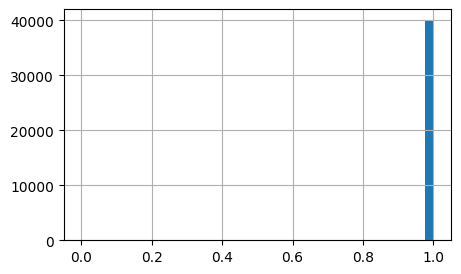

In [8]:
# Create /24 prefix column
df['prefix24'] = df['probe_addr'].str.rsplit('.', n=1).str[0]

# Aggregate block-level stats
block_stats = (
    df.groupby('prefix24')
      .agg(
          active=('availability', 'size'),
          dyn_frac=('label', lambda x: (x == 'DHCP/NAT').mean()),
          use_frac=('block_usage_fraction', 'first'),
          med_avail=('availability', 'median')
      )
      .reset_index()
)

# Plot histogram of block utilisation
block_stats['use_frac'].hist(bins=40, figsize=(5, 3))


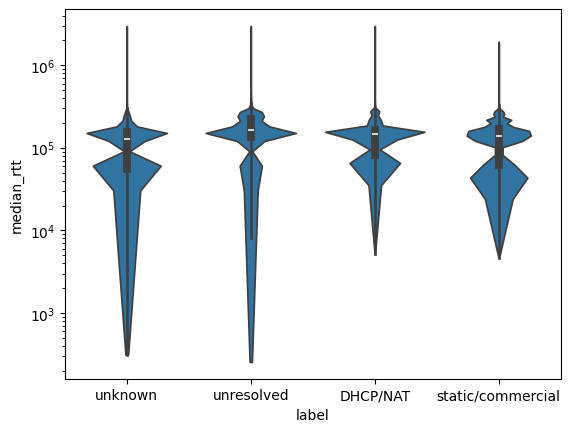

In [9]:
import seaborn as sns, matplotlib.pyplot as plt
sns.violinplot(data=df[df['median_rtt']>-1],
               x='label', y='median_rtt', cut=0)
plt.yscale('log')


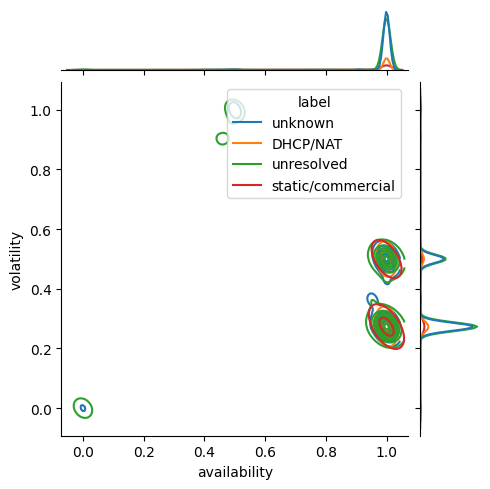

In [10]:
sns.jointplot(data=df.sample(200_000),   # subsample for plot
              x='availability', y='volatility',
              hue='label', kind='kde', height=5, thresh=.05)


<Axes: xlabel='first_octet'>

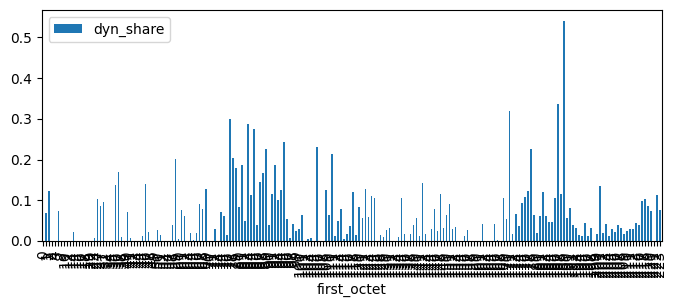

In [12]:
# Convert safely even with NaNs
df['first_octet'] = df['octet1'].astype('Int64')

# Share of dynamic IPs by first octet
dyn_by_octet = (
    df.groupby('first_octet')['label']
      .apply(lambda x: (x == 'DHCP/NAT').mean())
      .reset_index(name='dyn_share')
)

# Bar plot
dyn_by_octet.plot(x='first_octet', y='dyn_share', kind='bar', figsize=(8, 3))


<Axes: xlabel='use_frac', ylabel='rtt_var'>

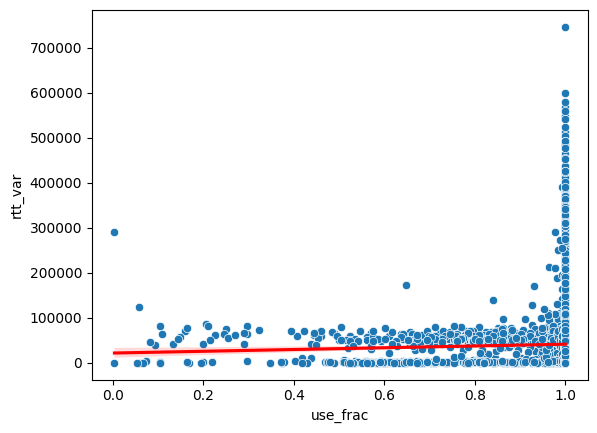

In [14]:
rtt_med = df.groupby('prefix24')['std_rtt'].median()
block_stats['rtt_var'] = block_stats['prefix24'].map(rtt_med)


sns.scatterplot(data=block_stats, x='use_frac', y='rtt_var')
sns.regplot(data=block_stats, x='use_frac', y='rtt_var', scatter=False, color='red')


In [18]:
# Calculate per-/24 median std_rtt
rtt_block = df.groupby('prefix24')['std_rtt'].median().rename('rtt_var_median')

# Join safely to block-level stats
stats = block_stats.join(rtt_block, on='prefix24')

# Mark jittery /24s
stats['is_lowbit'] = stats['rtt_var_median'] > 300_000  # µs

# Compare block usage fraction by RTT variance level
summary = stats.groupby('is_lowbit')['use_frac'].median()
print(summary)


is_lowbit
False    1.0
True     1.0
Name: use_frac, dtype: float64


In [19]:
print(df[df['is_private']==1]['label'].value_counts())


label
unresolved    59
Name: count, dtype: int64


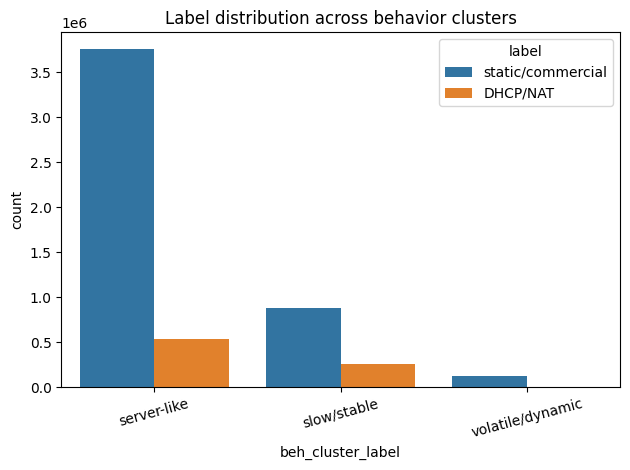

In [25]:
cluster_map = {
    0: "server-like",
    1: "slow/stable",
    2: "volatile/dynamic"
}
df['beh_cluster_label'] = df['beh_cluster'].map(cluster_map)
sns.countplot(data=df, x='beh_cluster_label', hue='label')
plt.title("Label distribution across behavior clusters")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [27]:
pd.crosstab(df['beh_cluster'], df['label'], normalize='index')


label,DHCP/NAT,static/commercial
beh_cluster,,
0,0.125658,0.874342
1,0.224521,0.775479
2,0.060752,0.939248


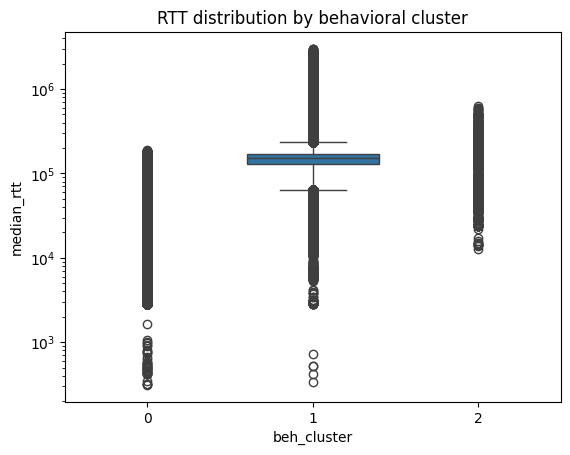

In [26]:
sns.boxplot(data=df, x='beh_cluster', y='median_rtt')
plt.title("RTT distribution by behavioral cluster")
plt.yscale('log'); plt.show()


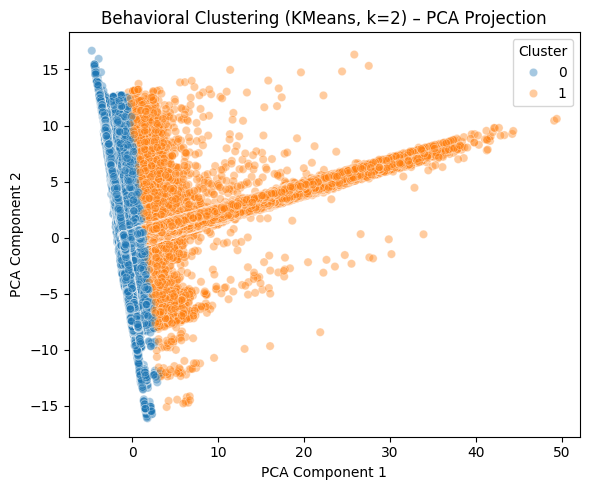

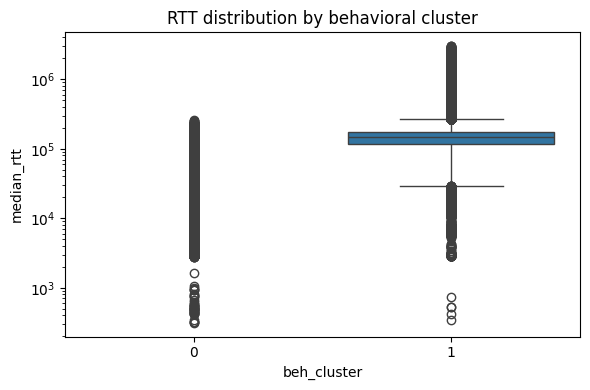


🔍 Cluster Centers (Original Scale):
   availability  volatility  volatility_count     median_up  median_down  \
0      0.980167    0.358228          3.264496  47096.269695 -2144.479749   
1      0.999008    0.332900          3.009178  48031.496659  -531.351231   

   longest_down     median_rtt       std_rtt        rtt_p95        rtt_p99  \
0   1107.099173   13196.348791    459.442429   14285.966268   14716.146459   
1   -140.207589  154835.697718  78283.722262  364565.985212  429000.915326   

   block_usage_fraction        ip_int      octet1      octet2      octet3  \
0              0.997331  1.891172e+09  112.229822  125.577528  125.325322   
1              0.998725  1.849093e+09  109.745221  119.567940  124.111133   

       octet4  is_private  
0  127.484089   -0.000374  
1  125.728480   -0.000321  

📊 Cluster Sizes:
beh_cluster
0    4638828
1     923282
Name: count, dtype: int64


In [30]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ---------- Load cleaned dataset ----------
df = pd.read_csv("aggregate_data_cleaned.csv")

# ---------- Full Behavioral Feature Set ----------
beh_cols = [
    "availability", "volatility", "volatility_count",
    "median_up", "median_down", "longest_down",
    "median_rtt", "std_rtt", "rtt_p95", "rtt_p99",
    "block_usage_fraction",
    "ip_int", "octet1", "octet2", "octet3", "octet4",
]

# Fill NaNs and scale
X_beh_raw = df[beh_cols].fillna(-1).values
scaler = StandardScaler()
X_beh = scaler.fit_transform(X_beh_raw)

# ---------- KMeans Clustering with 2 Clusters ----------
kmeans = KMeans(n_clusters=2, random_state=0)
df['beh_cluster'] = kmeans.fit_predict(X_beh)

# ---------- PCA for 2D Projection ----------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_beh)
df['pca1'] = X_pca[:, 0]
df['pca2'] = X_pca[:, 1]

# ---------- PCA Plot ----------
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='beh_cluster', palette='tab10', alpha=0.4)
plt.title("Behavioral Clustering (KMeans, k=2) – PCA Projection")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

# ---------- RTT Boxplot ----------
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='beh_cluster', y='median_rtt')
plt.yscale('log')
plt.title("RTT distribution by behavioral cluster")
plt.tight_layout()
plt.show()

# ---------- Cluster Centers ----------
cluster_centers = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=beh_cols
)
print("\n🔍 Cluster Centers (Original Scale):")
print(cluster_centers)

# ---------- Cluster Sizes ----------
print("\n📊 Cluster Sizes:")
print(df['beh_cluster'].value_counts())


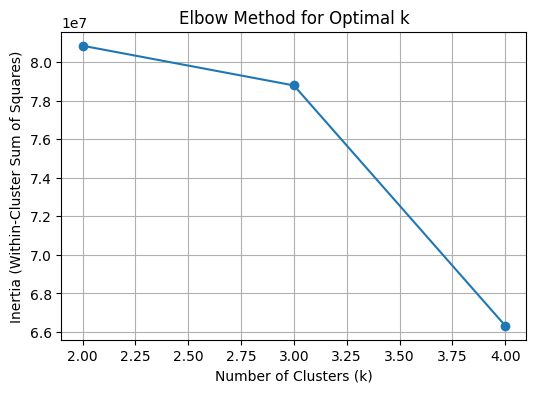

In [31]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K_range = range(2, 5)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_beh)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()


/var/folders/zp/mnxlykzj0f1_gg0bt_rcd83c0000gn/T/ipykernel_1239/3269145678.py:42: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/Users/chandni/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


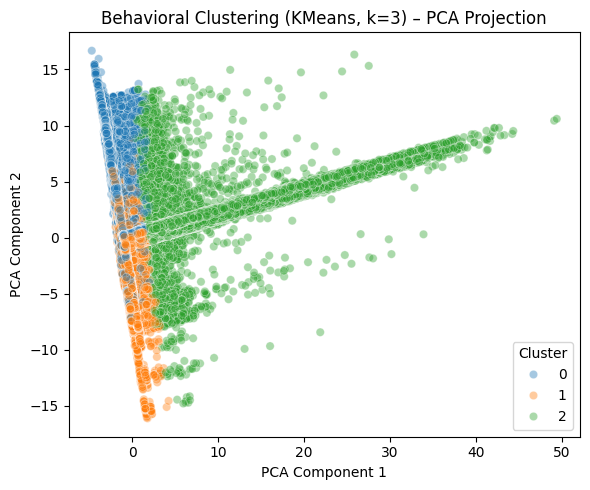

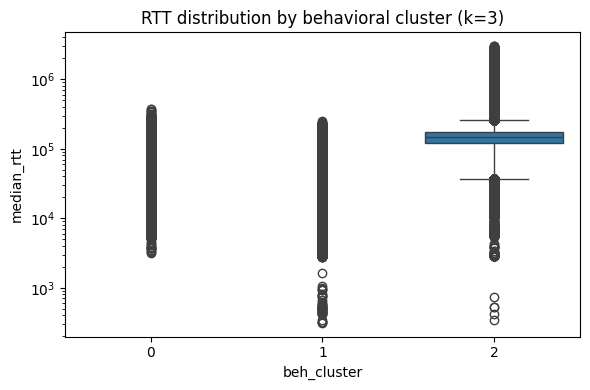


🔍 Cluster Centers (Original Scale):
   availability  volatility  volatility_count     median_up  median_down  \
0      0.947784    0.380242          3.760625  44600.006668  -940.685612   
1      0.995888    0.347080          3.024172  48303.691408 -2698.342172   
2      0.999090    0.333874          3.007652  48027.834988  -527.546566   

   longest_down     median_rtt       std_rtt        rtt_p95        rtt_p99  \
0   4550.434573   11807.519044    795.546315   13613.411560   14857.802886   
1   -554.631451   15311.577481    727.987695   16969.863427   18061.477380   
2   -146.636738  156770.868575  80675.375320  373777.392642  437662.520009   

   block_usage_fraction        ip_int      octet1      octet2      octet3  \
0              0.993727  3.150759e+09  187.314049  123.875866  125.746183   
1              0.999071  1.290912e+09   76.448010  126.436365  125.126556   
2              0.998734  1.840264e+09  109.220831  119.099923  124.040945   

       octet4  
0  127.588278  
1  1

In [32]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ---------- Load cleaned dataset ----------
df = pd.read_csv("aggregate_data_cleaned.csv")

# ---------- Full Behavioral Feature Set ----------
beh_cols = [
    "availability", "volatility", "volatility_count",
    "median_up", "median_down", "longest_down",
    "median_rtt", "std_rtt", "rtt_p95", "rtt_p99",
    "block_usage_fraction",
    "ip_int", "octet1", "octet2", "octet3", "octet4",
]

# Fill NaNs and scale
X_beh_raw = df[beh_cols].fillna(-1).values
scaler = StandardScaler()
X_beh = scaler.fit_transform(X_beh_raw)

# ---------- KMeans Clustering with 3 Clusters ----------
kmeans = KMeans(n_clusters=3, random_state=0)
df['beh_cluster'] = kmeans.fit_predict(X_beh)

# ---------- PCA for 2D Projection ----------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_beh)
df['pca1'] = X_pca[:, 0]
df['pca2'] = X_pca[:, 1]

# ---------- PCA Plot ----------
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='beh_cluster', palette='tab10', alpha=0.4)
plt.title("Behavioral Clustering (KMeans, k=3) – PCA Projection")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

# ---------- RTT Boxplot ----------
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='beh_cluster', y='median_rtt')
plt.yscale('log')
plt.title("RTT distribution by behavioral cluster (k=3)")
plt.tight_layout()
plt.show()

# ---------- Cluster Centers ----------
cluster_centers = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=beh_cols
)
print("\n🔍 Cluster Centers (Original Scale):")
print(cluster_centers)

# ---------- Cluster Sizes ----------
print("\n📊 Cluster Sizes:")
print(df['beh_cluster'].value_counts())


/var/folders/zp/mnxlykzj0f1_gg0bt_rcd83c0000gn/T/ipykernel_1239/2989847326.py:38: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/Users/chandni/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


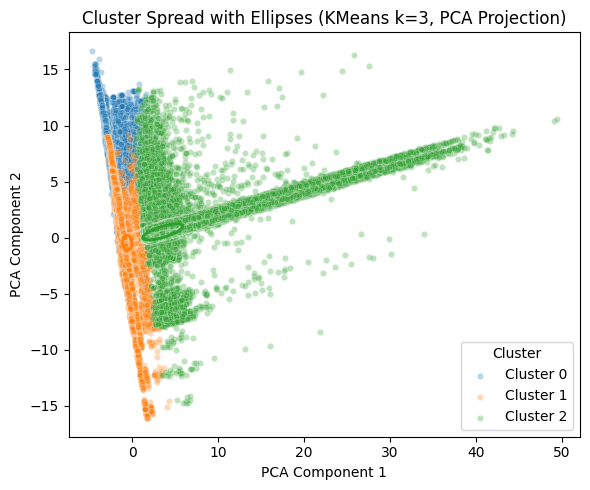

In [34]:


import numpy as np
from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt
import seaborn as sns

def draw_ellipse(position, covariance, ax=None, **kwargs):
    ax = ax or plt.gca()
    if covariance.shape == (2, 2):
        U, s, _ = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    ellipse = Ellipse(xy=position, width=width, height=height, angle=angle, **kwargs)
    ax.add_patch(ellipse)


# ---------- Cluster Ellipse Plot (k=3) ----------
plt.figure(figsize=(6, 5))
ax = plt.gca()
palette = sns.color_palette("tab10", n_colors=3)  # specifically for k=3

for i in sorted(df['beh_cluster'].unique()):
    subset = df[df['beh_cluster'] == i]
    sns.scatterplot(x='pca1', y='pca2', data=subset, label=f'Cluster {i}',
                    alpha=0.3, s=20, color=palette[i], ax=ax)
    
    # Compute ellipse parameters
    pos = subset[['pca1', 'pca2']].mean().values
    cov = np.cov(subset[['pca1', 'pca2']].values.T)
    draw_ellipse(pos, cov, ax=ax, edgecolor=palette[i], facecolor='none', linewidth=2)

plt.title("Cluster Spread with Ellipses (KMeans k=3, PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


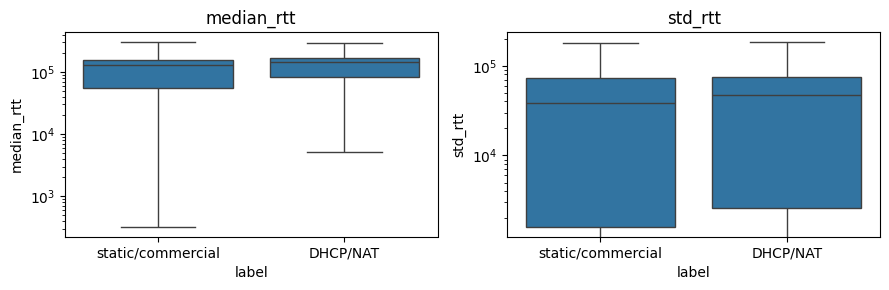

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(9,3))
for ax, col in zip(axes, ['median_rtt', 'std_rtt']):
    sns.boxplot(data=df[df[col]>-1], x='label', y=col, ax=ax, showfliers=False)
    ax.set_yscale('log'); ax.set_title(col)
plt.tight_layout()


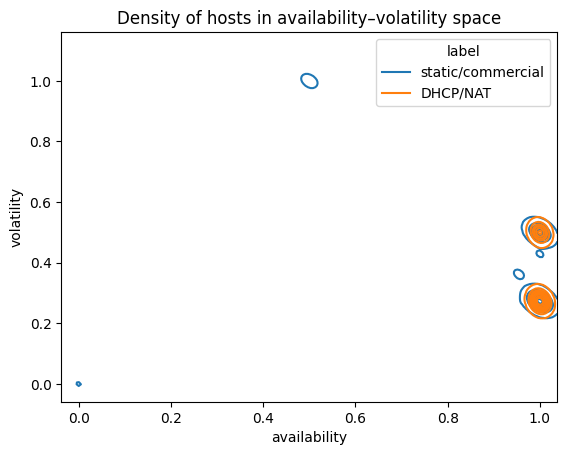

In [37]:
sample = df.sample(300_000, random_state=1)   # down‑sample for speed
sns.kdeplot(data=sample, x='availability', y='volatility',
            hue='label', thresh=.05, common_norm=False)
plt.title("Density of hosts in availability–volatility space")
plt.show()


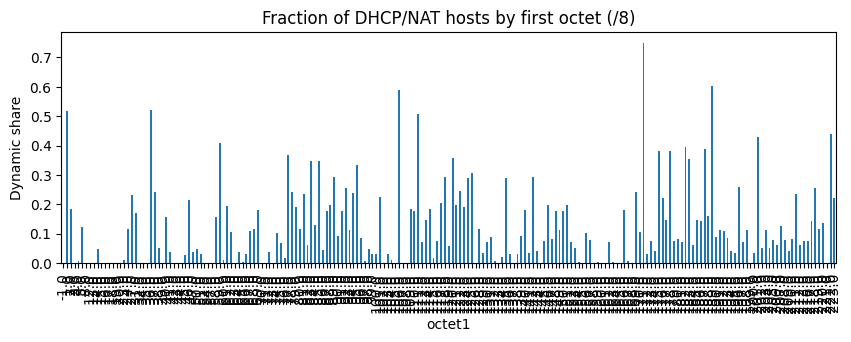

In [38]:
dyn_share_octet = (df.groupby('octet1')['label']
                     .apply(lambda s: (s=='DHCP/NAT').mean())
                     .reset_index(name='dyn_pct'))

dyn_share_octet.plot(x='octet1', y='dyn_pct', kind='bar', figsize=(10,3),
                     legend=False, ylabel='Dynamic share')
plt.title("Fraction of DHCP/NAT hosts by first octet (/8)")
plt.show()


In [39]:
df['prefix24'] = df['probe_addr'].str.rsplit('.', 1).str[0]

block_view = (df.groupby('prefix24')
                .agg(use_frac=('block_usage_fraction', 'first'),
                     rtt_var = ('std_rtt', 'median'))
                .query("use_frac>=0") )

sns.regplot(data=block_view.sample(50_000, random_state=2),
            x='use_frac', y='rtt_var', scatter_kws={'s':5}, line_kws={'color':'red'})
plt.yscale('log'); plt.xlabel('Block usage fraction'); plt.ylabel('Median RTT std dev')
plt.title("/24 utilisation vs. latency variance")
plt.show()


TypeError: rsplit() takes from 1 to 2 positional arguments but 3 were given

In [55]:
%%time
import pandas as pd, numpy as np, lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# # ---------- LOAD ----------
df = pd.read_csv("aggregate_data_with_meta.csv")

# ---------- LABEL CLEANUP ----------
df = df[df["label"] != "error"]          # rare scrape glitches
df = df[df["label"] != "unresolved"]     # Cai: no‑response hosts give no usage info
df = df[df["label"] != "nan"]
df["label"] = df["label"].astype(str)

print("Label distribution after cleanup:")
print(df["label"].value_counts())

# ---------- PREPROCESS FEATURES ----------
# log1p heavy‑tailed RTTs
df["prefix24"] = df["probe_addr"].str.rsplit(".", n=1).str[0]

df["median_rtt_log"] = np.log1p(df["median_rtt"])
df["std_rtt_log"]    = np.log1p(df["std_rtt"])
df["rtt_p95_log"]    = np.log1p(df["rtt_p95"])
df["rtt_p99_log"]    = np.log1p(df["rtt_p99"])

# Replace remaining NaNs with -1 sentinel
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(-1, inplace=True)

from sklearn.preprocessing import LabelEncoder

for col in ["prefix24", "domain"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
# ---------- FEATURE LIST ----------
features = [
    # Cai‑style behaviour
    "availability", "volatility", "volatility_count",
    "median_up", "median_down", "longest_down",
    # RTT stats (log‑scaled)
    "median_rtt_log", "std_rtt_log", "rtt_p95_log", "rtt_p99_log","domain",
    # subnet context + IP position
    "block_usage_fraction",
    "ip_int", "octet4","prefix24", "octet1", "octet2", "octet3", 
    "is_private"         # 0/1 flag
]

X = df[features].astype("float32")
y = df["label"]

# ---------- ENCODE TARGET ----------
le = LabelEncoder()
y_enc = le.fit_transform(y)

# ---------- TRAIN / TEST SPLIT ----------
X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc, test_size=0.2, stratify=y_enc, random_state=42
)

# ---------- MODEL ----------
clf = lgb.LGBMClassifier(
    n_estimators=200,
    learning_rate=0.05,
    num_leaves=63,
    class_weight="balanced",
    objective="multiclass",
    random_state=42,
    n_jobs=-1
)

clf.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric="multi_logloss"
)

# ---------- EVALUATION ----------
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(
    y_test, y_pred, target_names=le.classes_
))

# ---------- FEATURE IMPORTANCE ----------
fi = pd.DataFrame({
    "feature": features,
    "gain":    clf.booster_.feature_importance(importance_type="gain")
}).sort_values("gain", ascending=False)
print("\nTop features by gain:")
print(fi.head(15))


Label distribution after cleanup:
label
unknown              4182180
DHCP/NAT              801772
static/commercial     576125
nan                     2033
Name: count, dtype: int64
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.060319 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3516
[LightGBM] [Info] Number of data points in the train set: 4449688, number of used features: 19
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Accuracy: 0.9023059594290656
                   precision    recall  f1-score   support

         DHCP/NAT       0.81      0.97      0.88    160354
              nan       

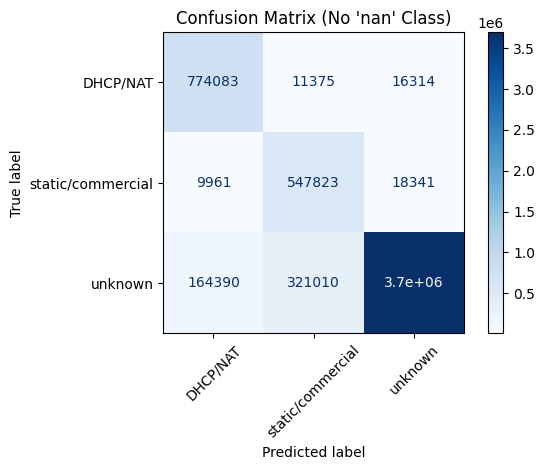


Classification Report (No 'nan' Class):
                   precision    recall  f1-score   support

         DHCP/NAT       0.82      0.97      0.88    801772
static/commercial       0.62      0.95      0.75    576125
          unknown       0.99      0.88      0.93   4182180

         accuracy                           0.90   5560077
        macro avg       0.81      0.93      0.86   5560077
     weighted avg       0.93      0.90      0.91   5560077



In [48]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

# Recreate label encoder if not already present
label_names = le.inverse_transform(np.unique(y_enc))

# Filter out "nan" class from predictions and true labels
mask = (df["label"] != "nan")
y_true_filtered = le.transform(df.loc[mask, "label"])
y_pred_filtered = clf.predict(X.loc[mask])

# Get label names excluding 'nan'
valid_labels = [label for label in label_names if label != 'nan']
valid_indices = [le.transform([lbl])[0] for lbl in valid_labels]

# Confusion Matrix
cm = confusion_matrix(y_true_filtered, y_pred_filtered, labels=valid_indices)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=valid_labels)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix (No 'nan' Class)")
plt.tight_layout()
plt.show()

# Classification Report
print("\nClassification Report (No 'nan' Class):")
print(classification_report(y_true_filtered, y_pred_filtered, target_names=valid_labels))


In [57]:
# Step 1: Filter out 'nan' rows
df_filtered = df[df["label"] != "nan"].copy()

# Step 2: Add prediction and true labels to filtered DataFrame
df_filtered["true_label"] = le.inverse_transform(y_true_filtered)
df_filtered["predicted_label"] = le.inverse_transform(y_pred_filtered)

# Step 3: Find DHCP/NAT misclassifications
dhcp_errors = df_filtered[
    (df_filtered["true_label"] == "DHCP/NAT") &
    (df_filtered["predicted_label"] != "DHCP/NAT")
]

# Step 4: Inspect or save
print(dhcp_errors[["probe_addr", "true_label", "predicted_label"] + features].head())

# Optional: save for detailed inspection
dhcp_errors.to_csv("dhcp_misclassifications.csv", index=False)


           probe_addr true_label    predicted_label  availability  volatility  \
249   128.125.107.100   DHCP/NAT            unknown           1.0    0.272727   
1056     87.63.141.23   DHCP/NAT  static/commercial           1.0    0.272727   
2015   195.83.167.197   DHCP/NAT            unknown           0.5    1.000000   
2548    177.11.18.162   DHCP/NAT            unknown           1.0    0.272727   
2934    193.86.27.134   DHCP/NAT            unknown           1.0    0.272727   

      volatility_count  median_up  median_down  longest_down  median_rtt_log  \
249                  3    48179.0          0.0           0.0            -1.0   
1056                 3    48179.0          0.0           0.0            -1.0   
2015                22        3.0        657.0       46856.0            -1.0   
2548                 3    48179.0          0.0           0.0            -1.0   
2934                 3    48179.0          0.0           0.0            -1.0   

      ...  rtt_p99_log  domain  

Blocks analysed (/ 24): 25,248
Mixed blocks (entropy > 0): 3,805  (15.07 %)

Most heterogeneous blocks:


pred_label,entropy,total,majority,DHCP/NAT,nan,static/commercial,unknown
block,,,,,,,
159.134.193,1.584963,3,DHCP/NAT,1,0,1,1
50.231.169,1.584963,3,DHCP/NAT,1,0,1,1
195.30.127,1.576621,13,unknown,4,0,4,5
125.234.157,1.569026,50,DHCP/NAT,20,0,16,14
195.80.177,1.565596,15,unknown,4,0,5,6
62.131.166,1.564405,44,static/commercial,12,0,18,14
176.223.133,1.561278,16,DHCP/NAT,6,0,6,4
94.24.50,1.558074,52,DHCP/NAT,21,0,13,18
125.234.149,1.555040,50,DHCP/NAT,19,0,19,12


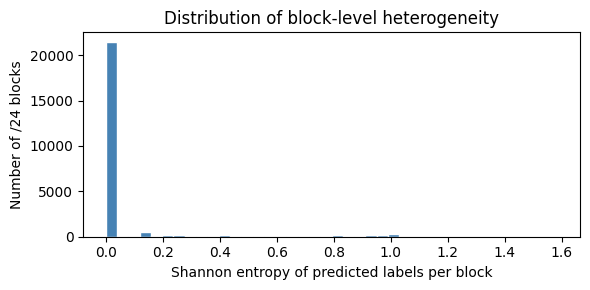

In [59]:
import pandas as pd
import numpy as np
from scipy.stats import entropy
import matplotlib.pyplot as plt

# ---------- Make sure test_df is built from X_test and predictions ----------
# Replace with your own predictions and X_test if already available
test_df = X_test.copy()
test_df['probe_addr'] = df.loc[X_test.index, 'probe_addr']  # Ensure probe_addr is present
test_df['pred_label'] = le.inverse_transform(y_pred)        # Map encoded labels back to string

# ---------- Choose block size (e.g., /24 or /20) ----------
BLOCK_BITS = 24  # change to 20 for /20 aggregation

def to_block(addr, bits=24):
    parts = addr.split('.')
    mask_octets = bits // 8
    return '.'.join(parts[:mask_octets])

test_df['block'] = test_df['probe_addr'].apply(lambda x: to_block(x, BLOCK_BITS))

# ---------- Compute per-block predicted label distribution ----------
blk_counts = (
    test_df.groupby(['block', 'pred_label'])
    .size()
    .unstack(fill_value=0)
)

# ---------- Compute entropy and majority label per block ----------
blk_stats = blk_counts.copy()
blk_stats['total'] = blk_counts.sum(axis=1)
blk_stats['entropy'] = blk_counts.apply(lambda row: entropy(row.values, base=2), axis=1)
blk_stats['majority'] = blk_counts.idxmax(axis=1)

# ---------- Report on mixed blocks ----------
mixed = blk_stats[blk_stats['entropy'] > 0]
pct_mixed = len(mixed) / len(blk_stats) * 100
print(f"Blocks analysed (/ {BLOCK_BITS}): {len(blk_stats):,}")
print(f"Mixed blocks (entropy > 0): {len(mixed):,}  ({pct_mixed:.2f} %)")

# ---------- Top-10 most heterogeneous blocks ----------
print("\nMost heterogeneous blocks:")
display(
    blk_stats.sort_values('entropy', ascending=False).head(10)[
        ['entropy', 'total', 'majority'] + list(blk_counts.columns)
    ]
)

# ---------- Plot histogram of block-level entropy ----------
plt.figure(figsize=(6, 3))
plt.hist(blk_stats['entropy'], bins=40, color='steelblue', edgecolor='white')
plt.xlabel('Shannon entropy of predicted labels per block')
plt.ylabel(f'Number of /{BLOCK_BITS} blocks')
plt.title('Distribution of block-level heterogeneity')
plt.tight_layout()
plt.show()


Blocks analysed (/ 24): 25,236
Mixed blocks (entropy > 0): 3,803  (15.07%)

Most heterogeneous blocks:


pred_label,entropy,total,majority,DHCP/NAT,static/commercial,unknown
block,,,,,,
159.134.193,1.584963,3,DHCP/NAT,1,1,1
50.231.169,1.584963,3,DHCP/NAT,1,1,1
195.30.127,1.576621,13,unknown,4,4,5
125.234.157,1.569026,50,DHCP/NAT,20,16,14
195.80.177,1.565596,15,unknown,4,5,6
62.131.166,1.564405,44,static/commercial,12,18,14
176.223.133,1.561278,16,DHCP/NAT,6,6,4
94.24.50,1.558074,52,DHCP/NAT,21,13,18
125.234.149,1.555040,50,DHCP/NAT,19,19,12


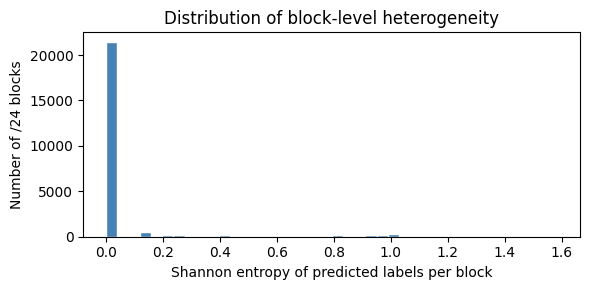

In [60]:
import pandas as pd
import numpy as np
from scipy.stats import entropy
import matplotlib.pyplot as plt

# ---------- Build test_df if not already ----------
# Make sure you have y_pred and X_test from earlier
test_df = X_test.copy()
test_df['probe_addr'] = df.loc[X_test.index, 'probe_addr']
test_df['pred_label'] = le.inverse_transform(y_pred)

# ---------- Remove 'nan' label rows ----------
test_df = test_df[test_df['pred_label'] != 'nan']

# ---------- Choose block size ----------
BLOCK_BITS = 24

def to_block(addr, bits=24):
    parts = addr.split('.')
    mask_octets = bits // 8
    return '.'.join(parts[:mask_octets])

test_df['block'] = test_df['probe_addr'].apply(lambda x: to_block(x, BLOCK_BITS))

# ---------- Per-block label distribution ----------
blk_counts = (
    test_df.groupby(['block', 'pred_label'])
    .size()
    .unstack(fill_value=0)
)

# ---------- Compute entropy and majority label per block ----------
blk_stats = blk_counts.copy()
blk_stats['total'] = blk_counts.sum(axis=1)
blk_stats['entropy'] = blk_counts.apply(lambda row: entropy(row.values, base=2), axis=1)
blk_stats['majority'] = blk_counts.idxmax(axis=1)

# ---------- Mixed block summary ----------
mixed = blk_stats[blk_stats['entropy'] > 0]
pct_mixed = len(mixed) / len(blk_stats) * 100
print(f"Blocks analysed (/ {BLOCK_BITS}): {len(blk_stats):,}")
print(f"Mixed blocks (entropy > 0): {len(mixed):,}  ({pct_mixed:.2f}%)")

# ---------- Top-10 most heterogeneous blocks ----------
print("\nMost heterogeneous blocks:")
display(
    blk_stats.sort_values('entropy', ascending=False).head(10)[
        ['entropy', 'total', 'majority'] + list(blk_counts.columns)
    ]
)

# ---------- Plot histogram ----------
plt.figure(figsize=(6, 3))
plt.hist(blk_stats['entropy'], bins=40, color='steelblue', edgecolor='white')
plt.xlabel('Shannon entropy of predicted labels per block')
plt.ylabel(f'Number of /{BLOCK_BITS} blocks')
plt.title('Distribution of block-level heterogeneity')
plt.tight_layout()
plt.show()
